<a href="https://colab.research.google.com/github/KubraErensoy/NLP_ANALYSIS/blob/main/NLP_Analysis_Musical_Instruments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from textblob import TextBlob
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_excel('Musical_Instruments_5.xlsx')
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1TLMSOE1VRDZI,B004XNK7AI,Igneous,2\n2,- This tuner is affordable and it works well....,5,"Easy to stay in tune. Small, handy & time saving",1343347200,"07 27, 2012"
1,A3ABAA36CZVYNX,B002EWV8IU,Dave,6\n8,- it's simple to operate- it does what it's ma...,5,"one can't fault it, really :-)",1276646400,"06 16, 2010"
2,A3TN5X62JAXGFB,B003SZDFM4,smi6375,2\n2,- Put this on a Gibson J-45. It did increase t...,3,OK for small or cheap guitars. Not good for hi...,1330646400,"03 2, 2012"
3,A1EX4410F46C8O,B0002CZVK0,"Matt32 ""LIGHT WEIGHT""",3\n10,"""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",3,serious musicians look elsewhere,1306713600,"05 30, 2011"
4,A37KJ0QD8HYF7A,B0002GIRP2,"Jing Garcia ""autoceremony""",7\n7,$49 for a $199 microphone at Amazon? May not b...,4,Not bad at all,1265932800,"02 12, 2010"
...,...,...,...,...,...,...,...,...,...
10256,AU3GYRAKBUAEU,B000CD1R7K,Jon Norris,189\n192,great foot rest,4,great foot rest,1258416000,"11 17, 2009"
10257,A3OEBPVLF35YQL,B005M0TKL8,StratDude,20\n21,This would be a must-have at twice the price.,5,This would be a must-have at twice the price.,1350172800,"10 14, 2012"
10258,A3N93PUHEMQU34,B004OU2IQG,"L. Su ""Flying train""",3\n3,To make you sound like a pro,5,To make you sound like a pro,1388102400,"12 27, 2013"
10259,A3ABAA36CZVYNX,B005M0TKL8,Dave,31\n32,"No power = No Sound, But It Sounds GREAT!",5,"No power = No Sound, But It Sounds GREAT!",1342569600,"07 18, 2012"


In [11]:
len(df)

10261

In [12]:
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1TLMSOE1VRDZI,B004XNK7AI,Igneous,2\n2,- This tuner is affordable and it works well....,5,"Easy to stay in tune. Small, handy & time saving",1343347200,"07 27, 2012"
1,A3ABAA36CZVYNX,B002EWV8IU,Dave,6\n8,- it's simple to operate- it does what it's ma...,5,"one can't fault it, really :-)",1276646400,"06 16, 2010"
2,A3TN5X62JAXGFB,B003SZDFM4,smi6375,2\n2,- Put this on a Gibson J-45. It did increase t...,3,OK for small or cheap guitars. Not good for hi...,1330646400,"03 2, 2012"
3,A1EX4410F46C8O,B0002CZVK0,"Matt32 ""LIGHT WEIGHT""",3\n10,"""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",3,serious musicians look elsewhere,1306713600,"05 30, 2011"
4,A37KJ0QD8HYF7A,B0002GIRP2,"Jing Garcia ""autoceremony""",7\n7,$49 for a $199 microphone at Amazon? May not b...,4,Not bad at all,1265932800,"02 12, 2010"


In [13]:
df.tail(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10256,AU3GYRAKBUAEU,B000CD1R7K,Jon Norris,189\n192,great foot rest,4,great foot rest,1258416000,"11 17, 2009"
10257,A3OEBPVLF35YQL,B005M0TKL8,StratDude,20\n21,This would be a must-have at twice the price.,5,This would be a must-have at twice the price.,1350172800,"10 14, 2012"
10258,A3N93PUHEMQU34,B004OU2IQG,"L. Su ""Flying train""",3\n3,To make you sound like a pro,5,To make you sound like a pro,1388102400,"12 27, 2013"
10259,A3ABAA36CZVYNX,B005M0TKL8,Dave,31\n32,"No power = No Sound, But It Sounds GREAT!",5,"No power = No Sound, But It Sounds GREAT!",1342569600,"07 18, 2012"
10260,A3OA4DV4L81N1D,B005NACC6M,"P.K. Frary ""Gochugogi""",4\n4,Great sound and features for the price!,5,Great sound and features for the price!,1387411200,"12 19, 2013"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [15]:
df["reviewerID"].unique()

array(['A1TLMSOE1VRDZI', 'A3ABAA36CZVYNX', 'A3TN5X62JAXGFB', ...,
       'AODIJK065X72D', 'A2CPP7BZKOF9TP', 'AWV58YYFEAUL0'], dtype=object)

In [16]:
df['CustomerNo'] = np.arange(len(df))

In [17]:
df["CustomerNo"] = df["CustomerNo"].apply(lambda x: "Customer" + str(x))

In [18]:
df = df.set_index("CustomerNo").reset_index()

In [19]:
df.head()

,CustomerNo,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,Customer0,A1TLMSOE1VRDZI,B004XNK7AI,Igneous,2\n2,- This tuner is affordable and it works well....,5,"Easy to stay in tune. Small, handy & time saving",1343347200,"07 27, 2012"
1,Customer1,A3ABAA36CZVYNX,B002EWV8IU,Dave,6\n8,- it's simple to operate- it does what it's ma...,5,"one can't fault it, really :-)",1276646400,"06 16, 2010"
2,Customer2,A3TN5X62JAXGFB,B003SZDFM4,smi6375,2\n2,- Put this on a Gibson J-45. It did increase t...,3,OK for small or cheap guitars. Not good for hi...,1330646400,"03 2, 2012"
3,Customer3,A1EX4410F46C8O,B0002CZVK0,"Matt32 ""LIGHT WEIGHT""",3\n10,"""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",3,serious musicians look elsewhere,1306713600,"05 30, 2011"
4,Customer4,A37KJ0QD8HYF7A,B0002GIRP2,"Jing Garcia ""autoceremony""",7\n7,$49 for a $199 microphone at Amazon? May not b...,4,Not bad at all,1265932800,"02 12, 2010"


In [20]:
df.tail(5)

,CustomerNo,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10256,Customer10256,AU3GYRAKBUAEU,B000CD1R7K,Jon Norris,189\n192,great foot rest,4,great foot rest,1258416000,"11 17, 2009"
10257,Customer10257,A3OEBPVLF35YQL,B005M0TKL8,StratDude,20\n21,This would be a must-have at twice the price.,5,This would be a must-have at twice the price.,1350172800,"10 14, 2012"
10258,Customer10258,A3N93PUHEMQU34,B004OU2IQG,"L. Su ""Flying train""",3\n3,To make you sound like a pro,5,To make you sound like a pro,1388102400,"12 27, 2013"
10259,Customer10259,A3ABAA36CZVYNX,B005M0TKL8,Dave,31\n32,"No power = No Sound, But It Sounds GREAT!",5,"No power = No Sound, But It Sounds GREAT!",1342569600,"07 18, 2012"
10260,Customer10260,A3OA4DV4L81N1D,B005NACC6M,"P.K. Frary ""Gochugogi""",4\n4,Great sound and features for the price!,5,Great sound and features for the price!,1387411200,"12 19, 2013"


In [21]:
df.drop(["reviewerID", "reviewerName", "asin", "unixReviewTime"], axis=1, inplace=True)

In [22]:
df.head()

,CustomerNo,helpful,reviewText,overall,summary,reviewTime
0,Customer0,2\n2,- This tuner is affordable and it works well....,5,"Easy to stay in tune. Small, handy & time saving","07 27, 2012"
1,Customer1,6\n8,- it's simple to operate- it does what it's ma...,5,"one can't fault it, really :-)","06 16, 2010"
2,Customer2,2\n2,- Put this on a Gibson J-45. It did increase t...,3,OK for small or cheap guitars. Not good for hi...,"03 2, 2012"
3,Customer3,3\n10,"""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",3,serious musicians look elsewhere,"05 30, 2011"
4,Customer4,7\n7,$49 for a $199 microphone at Amazon? May not b...,4,Not bad at all,"02 12, 2010"


In [23]:
df.tail(5)

,CustomerNo,helpful,reviewText,overall,summary,reviewTime
10256,Customer10256,189\n192,great foot rest,4,great foot rest,"11 17, 2009"
10257,Customer10257,20\n21,This would be a must-have at twice the price.,5,This would be a must-have at twice the price.,"10 14, 2012"
10258,Customer10258,3\n3,To make you sound like a pro,5,To make you sound like a pro,"12 27, 2013"
10259,Customer10259,31\n32,"No power = No Sound, But It Sounds GREAT!",5,"No power = No Sound, But It Sounds GREAT!","07 18, 2012"
10260,Customer10260,4\n4,Great sound and features for the price!,5,Great sound and features for the price!,"12 19, 2013"


In [25]:
from langdetect import detect

In [26]:
type(df['reviewText'])

pandas.core.series.Series

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerNo  10261 non-null  object
 1   helpful     10261 non-null  object
 2   reviewText  10261 non-null  object
 3   overall     10261 non-null  int64 
 4   summary     10261 non-null  object
 5   reviewTime  10261 non-null  object
dtypes: int64(1), object(5)
memory usage: 481.1+ KB


In [28]:
df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerNo  10261 non-null  object
 1   helpful     10261 non-null  object
 2   reviewText  10261 non-null  object
 3   overall     10261 non-null  int64 
 4   summary     10261 non-null  object
 5   reviewTime  10261 non-null  object
dtypes: int64(1), object(5)
memory usage: 561.1+ KB


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerNo  10261 non-null  object
 1   helpful     10261 non-null  object
 2   reviewText  10261 non-null  object
 3   overall     10261 non-null  int64 
 4   summary     10261 non-null  object
 5   reviewTime  10261 non-null  object
dtypes: int64(1), object(5)
memory usage: 561.1+ KB


In [31]:
df['reviewTextStr'] = df['reviewText'].astype(str)

In [32]:
type(df.reviewText[6265])

str

In [33]:
for index, row in df['reviewTextStr'].iteritems():
    lang = detect(row)
    df.loc[index, 'Language'] = lang

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerNo     10261 non-null  object
 1   helpful        10261 non-null  object
 2   reviewText     10261 non-null  object
 3   overall        10261 non-null  int64 
 4   summary        10261 non-null  object
 5   reviewTime     10261 non-null  object
 6   reviewTextStr  10261 non-null  object
 7   Language       10261 non-null  object
dtypes: int64(1), object(7)
memory usage: 979.5+ KB


In [35]:
pd.DataFrame(df.Language.value_counts())

,Language
en,10234
af,9
es,5
ca,2
so,2
et,2
no,1
cy,1
ro,1
de,1


In [36]:
df = df[df["Language"]=="en"]
df

,CustomerNo,helpful,reviewText,overall,summary,reviewTime,reviewTextStr,Language
0,Customer0,2\n2,- This tuner is affordable and it works well....,5,"Easy to stay in tune. Small, handy & time saving","07 27, 2012",- This tuner is affordable and it works well....,en
1,Customer1,6\n8,- it's simple to operate- it does what it's ma...,5,"one can't fault it, really :-)","06 16, 2010",- it's simple to operate- it does what it's ma...,en
2,Customer2,2\n2,- Put this on a Gibson J-45. It did increase t...,3,OK for small or cheap guitars. Not good for hi...,"03 2, 2012",- Put this on a Gibson J-45. It did increase t...,en
3,Customer3,3\n10,"""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",3,serious musicians look elsewhere,"05 30, 2011","""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",en
4,Customer4,7\n7,$49 for a $199 microphone at Amazon? May not b...,4,Not bad at all,"02 12, 2010",$49 for a $199 microphone at Amazon? May not b...,en
...,...,...,...,...,...,...,...,...
10256,Customer10256,189\n192,great foot rest,4,great foot rest,"11 17, 2009",great foot rest,en
10257,Customer10257,20\n21,This would be a must-have at twice the price.,5,This would be a must-have at twice the price.,"10 14, 2012",This would be a must-have at twice the price.,en
10258,Customer10258,3\n3,To make you sound like a pro,5,To make you sound like a pro,"12 27, 2013",To make you sound like a pro,en
10259,Customer10259,31\n32,"No power = No Sound, But It Sounds GREAT!",5,"No power = No Sound, But It Sounds GREAT!","07 18, 2012","No power = No Sound, But It Sounds GREAT!",en


In [37]:
df["reviewText"].isnull().values.any()

False

In [38]:
df["Language"].isnull().values.any()

False

In [39]:
df["Language"].value_counts()

en    10234
Name: Language, dtype: int64

In [40]:
df['year'] = pd.DatetimeIndex(df['reviewTime']).year
df.head()

,CustomerNo,helpful,reviewText,overall,summary,reviewTime,reviewTextStr,Language,year
0,Customer0,2\n2,- This tuner is affordable and it works well....,5,"Easy to stay in tune. Small, handy & time saving","07 27, 2012",- This tuner is affordable and it works well....,en,2012
1,Customer1,6\n8,- it's simple to operate- it does what it's ma...,5,"one can't fault it, really :-)","06 16, 2010",- it's simple to operate- it does what it's ma...,en,2010
2,Customer2,2\n2,- Put this on a Gibson J-45. It did increase t...,3,OK for small or cheap guitars. Not good for hi...,"03 2, 2012",- Put this on a Gibson J-45. It did increase t...,en,2012
3,Customer3,3\n10,"""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",3,serious musicians look elsewhere,"05 30, 2011","""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",en,2011
4,Customer4,7\n7,$49 for a $199 microphone at Amazon? May not b...,4,Not bad at all,"02 12, 2010",$49 for a $199 microphone at Amazon? May not b...,en,2010


In [41]:
df.drop(["reviewTime"], axis=1, inplace=True)

In [42]:
df.head()

,CustomerNo,helpful,reviewText,overall,summary,reviewTextStr,Language,year
0,Customer0,2\n2,- This tuner is affordable and it works well....,5,"Easy to stay in tune. Small, handy & time saving",- This tuner is affordable and it works well....,en,2012
1,Customer1,6\n8,- it's simple to operate- it does what it's ma...,5,"one can't fault it, really :-)",- it's simple to operate- it does what it's ma...,en,2010
2,Customer2,2\n2,- Put this on a Gibson J-45. It did increase t...,3,OK for small or cheap guitars. Not good for hi...,- Put this on a Gibson J-45. It did increase t...,en,2012
3,Customer3,3\n10,"""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",3,serious musicians look elsewhere,"""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",en,2011
4,Customer4,7\n7,$49 for a $199 microphone at Amazon? May not b...,4,Not bad at all,$49 for a $199 microphone at Amazon? May not b...,en,2010


In [43]:
df["overall"].value_counts()

5    6913
4    2082
3     772
2     250
1     217
Name: overall, dtype: int64

Text(0.5, 1.0, 'Distribution of Point')

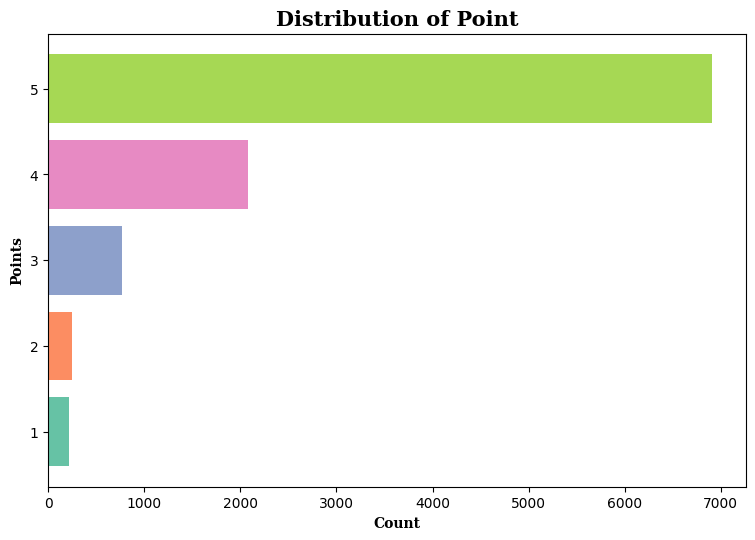

In [44]:
point_dist = df.groupby("overall").count().reset_index()
point_dist
col_map = plt.get_cmap('Set2')
plt.figure(figsize=(9,6),dpi=100)
plt.barh(point_dist.overall, point_dist.helpful,color=col_map.colors);
plt.xlabel("Count",weight="bold", family='serif', c="Black", fontsize=10)
plt.ylabel("Points", weight="bold", family='serif', c="Black", fontsize=10)
plt.title("Distribution of Point", family='serif',fontsize = 15,loc='center',color='black',weight="bold")

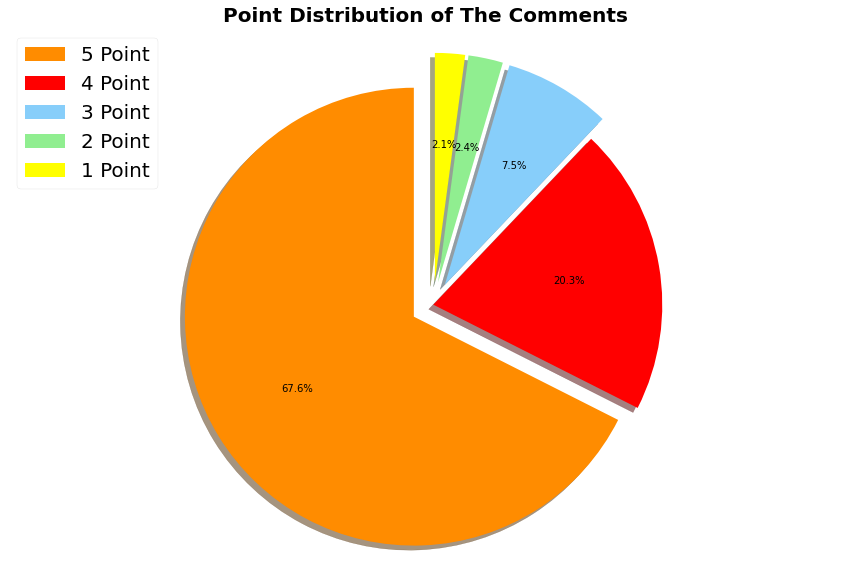

In [45]:
plt.style.use('seaborn-notebook')
fig1, ax1 = plt.subplots(figsize =(15, 10))
label = '5 Point', '4 Point', '3 Point', '2 Point','1 Point'
point_count = [6914, 2082, 772, 250, 217]
colors_list = ["darkorange",'red','lightskyblue' ,'lightgreen', 'yellow']
explode = (0.1, 0,  0.1 ,0.1,0.1)  
ax1.pie(point_count, explode=explode,  autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors_list)
plt.title("Point Distribution of The Comments", weight="bold", c="Black", fontsize=20)
plt.axis('equal') 
plt.legend(labels=label, loc='upper left',fontsize=20) 
plt.show()

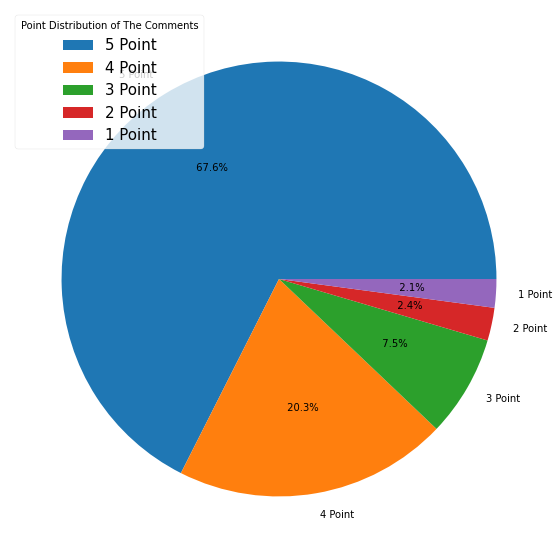

In [46]:
plt.style.use('seaborn-notebook')
fig1, ax1 = plt.subplots(figsize =(15, 10))
y = np.array([6914, 2082, 772, 250, 217])
mylabels = ['5 Point', '4 Point', '3 Point', '2 Point','1 Point']

plt.pie(y, labels = mylabels, autopct='%5.1f%%')
plt.legend(labels=mylabels, loc='upper left',title = "Point Distribution of The Comments", fontsize=15)
plt.show() 

In [47]:
import re
import string

In [48]:
df["reviewText"] = df["reviewText"].apply(lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ",x.lower())) # Remove punctuations and lower
df["reviewText"] = df["reviewText"].apply(lambda x: re.sub("\w*\d\w*", " ",x)) # Remove numbers
df["reviewText"] = df["reviewText"].apply(lambda x: re.sub("\n"," ",x)) # Remove \n

In [49]:
df["reviewText"]

0           this tuner is affordable and it works well ...
1          it s simple to operate  it does what it s ma...
2          put this on a gibson j    it did increase th...
3         oh its a crybaby    i have a crybaby wah    y...
4           for a    microphone at amazon  may not be t...
                               ...                        
10256                                      great foot rest
10257        this would be a must have at twice the price 
10258                         to make you sound like a pro
10259            no power   no sound  but it sounds great 
10260              great sound and features for the price 
Name: reviewText, Length: 10234, dtype: object

In [50]:
def sentiment(overall):
    if overall >= 4:
        return "Positive"
    elif overall == 3:
        return "Neutral"
    else:
        return "Negative"

In [51]:
df["sentiment"] = df["overall"].apply(sentiment)

In [52]:
df.head()

,CustomerNo,helpful,reviewText,overall,summary,reviewTextStr,Language,year,sentiment
0,Customer0,2\n2,this tuner is affordable and it works well ...,5,"Easy to stay in tune. Small, handy & time saving",- This tuner is affordable and it works well....,en,2012,Positive
1,Customer1,6\n8,it s simple to operate it does what it s ma...,5,"one can't fault it, really :-)",- it's simple to operate- it does what it's ma...,en,2010,Positive
2,Customer2,2\n2,put this on a gibson j it did increase th...,3,OK for small or cheap guitars. Not good for hi...,- Put this on a Gibson J-45. It did increase t...,en,2012,Neutral
3,Customer3,3\n10,oh its a crybaby i have a crybaby wah y...,3,serious musicians look elsewhere,"""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",en,2011,Neutral
4,Customer4,7\n7,for a microphone at amazon may not be t...,4,Not bad at all,$49 for a $199 microphone at Amazon? May not b...,en,2010,Positive


In [53]:
df.sentiment.value_counts()

Positive    8995
Neutral      772
Negative     467
Name: sentiment, dtype: int64

<Figure size 1080x720 with 0 Axes>

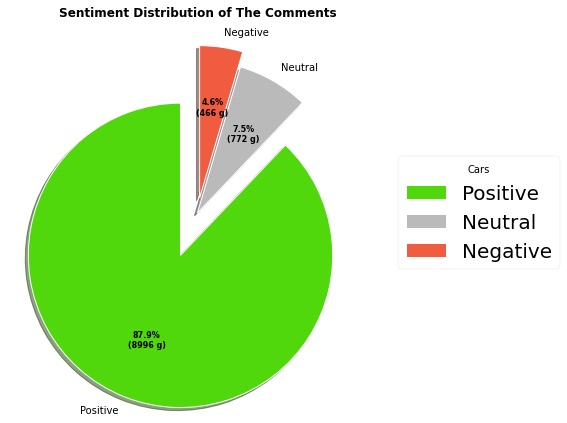

In [54]:
plt.figure(figsize = [15, 10])
label = ['Positive', 'Neutral', 'Negative']
point_count = [8996, 772, 467]
explode=(0.3,0,0.1)
colors=("#51d80d","#bababa","#ef5c3f")
wp = { 'linewidth' : 1, 'edgecolor' : "white" }


# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(point_count,
                                  autopct = lambda pct: func(pct, point_count),
                                  explode = explode,
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
 # Adding legend
ax.legend(wedges, label,
          title ="Cars",
          loc ="center left",
          fontsize=20,
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Sentiment Distribution of The Comments", c="black", fontsize=12, weight="bold")
 
# show plot
plt.show()


Text(0.5, 1.0, 'Distribution of Sentiment')

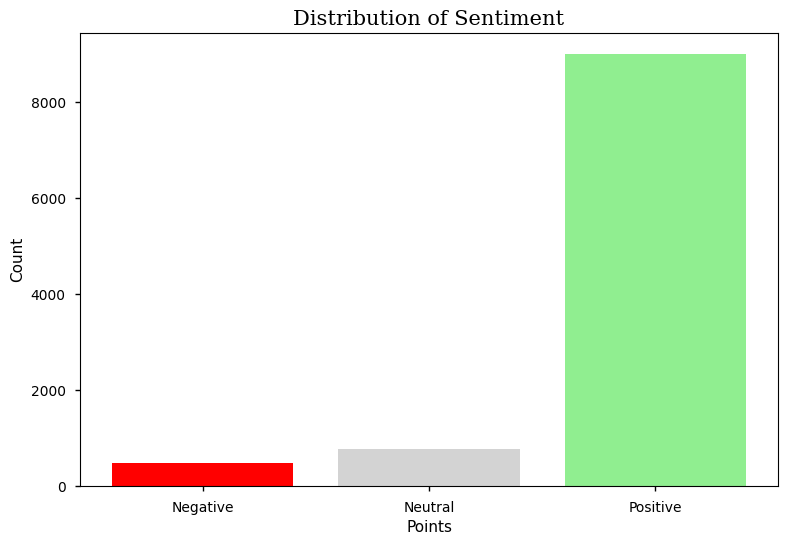

In [55]:
sentiment_dist = df.groupby("sentiment").count().reset_index()
sentiment_dist
plt.figure(figsize=(9,6),dpi=100)
colors=['red','lightgrey','lightgreen']
plt.bar(sentiment_dist.sentiment, sentiment_dist.helpful,color=colors);
plt.xlabel("Points")
plt.ylabel("Count")
plt.title("Distribution of Sentiment", family='serif',fontsize = 15,loc='center',color='black')

In [56]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [57]:
n2_bigrams = get_top_n_gram(df['reviewText'],(2,2),20)
n3_bigrams = get_top_n_gram(df['reviewText'],(3,3),20)

In [58]:
n2_bigrams

[('works great', 388),
 ('easy use', 298),
 ('ve used', 293),
 ('acoustic guitar', 292),
 ('planet waves', 257),
 ('long time', 229),
 ('highly recommend', 227),
 ('electric guitar', 220),
 ('les paul', 216),
 ('pedal board', 213),
 ('sound great', 209),
 ('good quality', 207),
 ('does job', 199),
 ('power supply', 188),
 ('just fine', 185),
 ('don know', 183),
 ('great price', 176),
 ('high quality', 173),
 ('really like', 169),
 ('sound good', 169)]

In [59]:
n3_bigrams

[('built like tank', 47),
 ('works just fine', 40),
 ('ernie ball strings', 37),
 ('gibson les paul', 32),
 ('playing guitar years', 32),
 ('local music store', 30),
 ('acoustic electric guitars', 29),
 ('solid state amp', 29),
 ('does good job', 28),
 ('just make sure', 28),
 ('acoustic electric guitar', 27),
 ('epiphone les paul', 26),
 ('work just fine', 26),
 ('ve playing guitar', 26),
 ('does great job', 24),
 ('strings sound great', 22),
 ('acoustic guitar strings', 18),
 ('works like charm', 17),
 ('accurate easy use', 17),
 ('electric guitar strings', 17)]

In [60]:
df_negative = df[df["sentiment"]=="Negative"]
df_positive = df[df["sentiment"]=="Positive"]
df_neutral = df[df["sentiment"]=="Neutral"]

In [61]:
n2_bigrams_negative = get_top_n_gram(df_negative['reviewText'],(2,2),20)
n3_bigrams_negative = get_top_n_gram(df_negative['reviewText'],(3,3),20)

In [62]:
n2_bigrams_neutral = get_top_n_gram(df_neutral['reviewText'],(2,2),20)
n3_bigrams_neutral = get_top_n_gram(df_neutral['reviewText'],(3,3),20)

In [63]:
n2_bigrams_positive = get_top_n_gram(df_positive['reviewText'],(2,2),20)
n3_bigrams_positive = get_top_n_gram(df_positive['reviewText'],(3,3),20)

In [64]:
n3_bigrams_positive

[('built like tank', 44),
 ('works just fine', 39),
 ('ernie ball strings', 32),
 ('gibson les paul', 29),
 ('playing guitar years', 28),
 ('acoustic electric guitars', 27),
 ('solid state amp', 27),
 ('local music store', 27),
 ('work just fine', 26),
 ('does good job', 26),
 ('just make sure', 26),
 ('does great job', 24),
 ('acoustic electric guitar', 23),
 ('epiphone les paul', 22),
 ('ve playing guitar', 21),
 ('strings sound great', 20),
 ('works like charm', 17),
 ('phosphor bronze strings', 16),
 ('accurate easy use', 16),
 ('acoustic guitar strings', 16)]

In [65]:
n3_bigrams_neutral

[('planet waves capo', 5),
 ('planet waves strap', 5),
 ('les paul guitars', 5),
 ('things don like', 4),
 ('tone pure nickels', 4),
 ('local hardware store', 3),
 ('strings sound good', 3),
 ('distortion pedals really', 3),
 ('ernie ball strings', 3),
 ('job just fine', 3),
 ('mini headstock tuner', 3),
 ('midi data computer', 3),
 ('acoustic electric guitar', 3),
 ('owned pedal years', 3),
 ('gibson les paul', 3),
 ('bad product just', 3),
 ('high gain metal', 3),
 ('finish sound hole', 2),
 ('high end guitars', 2),
 ('lead boost distorted', 2)]

In [66]:
n3_bigrams_negative

[('boss gt patches', 8),
 ('gt patches james', 8),
 ('patches james limborg', 8),
 ('guitar sound like', 5),
 ('install boss gt', 4),
 ('line level signal', 4),
 ('pitch correction function', 4),
 ('little big muff', 3),
 ('cool cat metal', 3),
 ('planet waves capo', 3),
 ('sound like eddie', 3),
 ('like eddie van', 3),
 ('eddie van halen', 3),
 ('van halen joe', 3),
 ('halen joe satriani', 3),
 ('joe satriani guitarists', 3),
 ('satriani guitarists studio', 3),
 ('guitarists studio album', 3),
 ('studio album guitar', 3),
 ('album guitar sound', 3)]

In [67]:
df.head()

,CustomerNo,helpful,reviewText,overall,summary,reviewTextStr,Language,year,sentiment
0,Customer0,2\n2,this tuner is affordable and it works well ...,5,"Easy to stay in tune. Small, handy & time saving",- This tuner is affordable and it works well....,en,2012,Positive
1,Customer1,6\n8,it s simple to operate it does what it s ma...,5,"one can't fault it, really :-)",- it's simple to operate- it does what it's ma...,en,2010,Positive
2,Customer2,2\n2,put this on a gibson j it did increase th...,3,OK for small or cheap guitars. Not good for hi...,- Put this on a Gibson J-45. It did increase t...,en,2012,Neutral
3,Customer3,3\n10,oh its a crybaby i have a crybaby wah y...,3,serious musicians look elsewhere,"""Oh its a crybaby"", ""I have a crybaby wah"", ""Y...",en,2011,Neutral
4,Customer4,7\n7,for a microphone at amazon may not be t...,4,Not bad at all,$49 for a $199 microphone at Amazon? May not b...,en,2010,Positive


In [68]:
#we willl be using 4 columns
df_review = df[['sentiment','overall', 'reviewText','Language']]
df_review.head()
#reviewText aşamasında bunlar yapıldı   Remove \n,Remove numbers,Remove punctuations and lower
#Expanding Contractions
#


,sentiment,overall,reviewText,Language
0,Positive,5,this tuner is affordable and it works well ...,en
1,Positive,5,it s simple to operate it does what it s ma...,en
2,Neutral,3,put this on a gibson j it did increase th...,en
3,Neutral,3,oh its a crybaby i have a crybaby wah y...,en
4,Positive,4,for a microphone at amazon may not be t...,en


In [71]:
import nltk
import string
import fasttext
import pickle
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)


In [72]:
#Let's begin by expanding any contractions we might have (ie. "I've" or "I'll"). Keep in mind that this will effectively tokenize the rating descriptions but each contraction wil be a single token. I other words, "I've" will be "I have" instead of "I", "Have".
df_review['no_contract'] = df_review['reviewText'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df_review.head(25)

,sentiment,overall,reviewText,Language,no_contract
0,Positive,5,this tuner is affordable and it works well i have purchased six so far they are sturdy the...,en,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,..."
1,Positive,5,it s simple to operate it does what it s made to do it does that very well it s bargaintast...,en,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it..."
2,Neutral,3,put this on a gibson j it did increase the bass ok as that s not a j s strength but it...,en,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren..."
3,Neutral,3,oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tir...,en,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby..."
4,Positive,4,for a microphone at amazon may not be the best mic out there but for home studios this o...,en,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi..."
5,Neutral,3,nice for the price practical everyday useable money well spent on this one for sur...,en,"[nice, for, the, price, practical, everyday, useable, money, well, spent, on, this, one, for, su..."
6,Positive,5,quality of this banjo exceeded my expectations great beginner banjo with quality components...,en,"[quality, of, this, banjo, exceeded, my, expectations, great, beginner, banjo, with, quality, co..."
7,Positive,4,star rating based on price great for home use but dragging it on the road i dont know how lon...,en,"[star, rating, based, on, price, great, for, home, use, but, dragging, it, on, the, road, i, do ..."
8,Positive,4,this review is legit i bought this mixer back in august or september cant really remember but...,en,"[this, review, is, legit, i, bought, this, mixer, back, in, august, or, september, cannot, reall..."
9,Positive,5,shipping the epiphone comes wrapped in protective foam inside a gig bag which is inside a...,en,"[shipping, the, epiphone, comes, wrapped, in, protective, foam, inside, a, gig, bag, which, is, ..."


In [73]:
#no_contract sutununu tekrar string haline getirelim
df_review['reviewtext_str'] = [' '.join(map(str, l)) for l in df_review['no_contract']]
df_review.head()

,sentiment,overall,reviewText,Language,no_contract,reviewtext_str
0,Positive,5,this tuner is affordable and it works well i have purchased six so far they are sturdy the...,en,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...",this tuner is affordable and it works well i have purchased six so far they are sturdy they have...
1,Positive,5,it s simple to operate it does what it s made to do it does that very well it s bargaintast...,en,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...",it s simple to operate it does what it s made to do it does that very well it s bargaintasticif ...
2,Neutral,3,put this on a gibson j it did increase the bass ok as that s not a j s strength but it...,en,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...",put this on a gibson j it did increase the bass ok as that s not a j s strength but it ruined th...
3,Neutral,3,oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tir...,en,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...",oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tired of hear...
4,Positive,4,for a microphone at amazon may not be the best mic out there but for home studios this o...,en,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...",for a microphone at amazon may not be the best mic out there but for home studios this one marks...


In [75]:
#Tokenization
df_review['tokenized'] = df_review['reviewtext_str'].apply(word_tokenize)
df_review.head()

,sentiment,overall,reviewText,Language,no_contract,reviewtext_str,tokenized
0,Positive,5,this tuner is affordable and it works well i have purchased six so far they are sturdy the...,en,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...",this tuner is affordable and it works well i have purchased six so far they are sturdy they have...,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,..."
1,Positive,5,it s simple to operate it does what it s made to do it does that very well it s bargaintast...,en,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...",it s simple to operate it does what it s made to do it does that very well it s bargaintasticif ...,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it..."
2,Neutral,3,put this on a gibson j it did increase the bass ok as that s not a j s strength but it...,en,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...",put this on a gibson j it did increase the bass ok as that s not a j s strength but it ruined th...,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren..."
3,Neutral,3,oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tir...,en,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...",oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tired of hear...,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby..."
4,Positive,4,for a microphone at amazon may not be the best mic out there but for home studios this o...,en,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...",for a microphone at amazon may not be the best mic out there but for home studios this one marks...,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi..."


In [77]:
#Removing Stopwords
stop_words = set(stopwords.words('english'))
df_review['removed_stopwords'] = df_review['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
df_review.head()

,sentiment,overall,reviewText,Language,no_contract,reviewtext_str,tokenized,removed_stopwords
0,Positive,5,this tuner is affordable and it works well i have purchased six so far they are sturdy the...,en,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...",this tuner is affordable and it works well i have purchased six so far they are sturdy they have...,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...","[tuner, affordable, works, well, purchased, six, far, sturdy, come, battery, box, install, actua..."
1,Positive,5,it s simple to operate it does what it s made to do it does that very well it s bargaintast...,en,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...",it s simple to operate it does what it s made to do it does that very well it s bargaintasticif ...,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...","[simple, operate, made, well, bargaintasticif, know, noise, gate, supposed, think, might, need, ..."
2,Neutral,3,put this on a gibson j it did increase the bass ok as that s not a j s strength but it...,en,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...",put this on a gibson j it did increase the bass ok as that s not a j s strength but it ruined th...,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...","[put, gibson, j, increase, bass, ok, j, strength, ruined, wonderful, clarity, balance, guitars, ..."
3,Neutral,3,oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tir...,en,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...",oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tired of hear...,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...","[oh, crybaby, crybaby, wah, suck, crybaby, tired, hearing, statements, guitarists, fresh, even, ..."
4,Positive,4,for a microphone at amazon may not be the best mic out there but for home studios this o...,en,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...",for a microphone at amazon may not be the best mic out there but for home studios this one marks...,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...","[microphone, amazon, may, best, mic, home, studios, one, marks, spot, get, budget]"


In [79]:
# verbnoun ,nounadj,. #kelimeleri etiketliyor
df_review['pos_tag'] = df_review['removed_stopwords'].apply(nltk.tag.pos_tag)
df_review.head()

,sentiment,overall,reviewText,Language,no_contract,reviewtext_str,tokenized,removed_stopwords,pos_tag
0,Positive,5,this tuner is affordable and it works well i have purchased six so far they are sturdy the...,en,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...",this tuner is affordable and it works well i have purchased six so far they are sturdy they have...,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...","[tuner, affordable, works, well, purchased, six, far, sturdy, come, battery, box, install, actua...","[(tuner, NN), (affordable, JJ), (works, VBZ), (well, RB), (purchased, VBN), (six, CD), (far, RB)..."
1,Positive,5,it s simple to operate it does what it s made to do it does that very well it s bargaintast...,en,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...",it s simple to operate it does what it s made to do it does that very well it s bargaintasticif ...,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...","[simple, operate, made, well, bargaintasticif, know, noise, gate, supposed, think, might, need, ...","[(simple, NN), (operate, NN), (made, VBN), (well, RB), (bargaintasticif, RB), (know, VBP), (nois..."
2,Neutral,3,put this on a gibson j it did increase the bass ok as that s not a j s strength but it...,en,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...",put this on a gibson j it did increase the bass ok as that s not a j s strength but it ruined th...,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...","[put, gibson, j, increase, bass, ok, j, strength, ruined, wonderful, clarity, balance, guitars, ...","[(put, VB), (gibson, NN), (j, NN), (increase, NN), (bass, NN), (ok, JJ), (j, NN), (strength, NN)..."
3,Neutral,3,oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tir...,en,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...",oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tired of hear...,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...","[oh, crybaby, crybaby, wah, suck, crybaby, tired, hearing, statements, guitarists, fresh, even, ...","[(oh, UH), (crybaby, NN), (crybaby, NN), (wah, VBD), (suck, JJ), (crybaby, NN), (tired, VBD), (h..."
4,Positive,4,for a microphone at amazon may not be the best mic out there but for home studios this o...,en,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...",for a microphone at amazon may not be the best mic out there but for home studios this one marks...,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...","[microphone, amazon, may, best, mic, home, studios, one, marks, spot, get, budget]","[(microphone, NN), (amazon, NN), (may, MD), (best, VB), (mic, JJ), (home, NN), (studios, NNS), (..."


In [80]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [83]:
df_review['wordnet_pos'] = df_review['pos_tag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_review.head()

,sentiment,overall,reviewText,Language,no_contract,reviewtext_str,tokenized,removed_stopwords,pos_tag,wordnet_pos
0,Positive,5,this tuner is affordable and it works well i have purchased six so far they are sturdy the...,en,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...",this tuner is affordable and it works well i have purchased six so far they are sturdy they have...,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...","[tuner, affordable, works, well, purchased, six, far, sturdy, come, battery, box, install, actua...","[(tuner, NN), (affordable, JJ), (works, VBZ), (well, RB), (purchased, VBN), (six, CD), (far, RB)...","[(tuner, n), (affordable, a), (works, v), (well, r), (purchased, v), (six, n), (far, r), (sturdy..."
1,Positive,5,it s simple to operate it does what it s made to do it does that very well it s bargaintast...,en,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...",it s simple to operate it does what it s made to do it does that very well it s bargaintasticif ...,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...","[simple, operate, made, well, bargaintasticif, know, noise, gate, supposed, think, might, need, ...","[(simple, NN), (operate, NN), (made, VBN), (well, RB), (bargaintasticif, RB), (know, VBP), (nois...","[(simple, n), (operate, n), (made, v), (well, r), (bargaintasticif, r), (know, v), (noise, r), (..."
2,Neutral,3,put this on a gibson j it did increase the bass ok as that s not a j s strength but it...,en,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...",put this on a gibson j it did increase the bass ok as that s not a j s strength but it ruined th...,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...","[put, gibson, j, increase, bass, ok, j, strength, ruined, wonderful, clarity, balance, guitars, ...","[(put, VB), (gibson, NN), (j, NN), (increase, NN), (bass, NN), (ok, JJ), (j, NN), (strength, NN)...","[(put, v), (gibson, n), (j, n), (increase, n), (bass, n), (ok, a), (j, n), (strength, n), (ruine..."
3,Neutral,3,oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tir...,en,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...",oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tired of hear...,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...","[oh, crybaby, crybaby, wah, suck, crybaby, tired, hearing, statements, guitarists, fresh, even, ...","[(oh, UH), (crybaby, NN), (crybaby, NN), (wah, VBD), (suck, JJ), (crybaby, NN), (tired, VBD), (h...","[(oh, n), (crybaby, n), (crybaby, n), (wah, v), (suck, a), (crybaby, n), (tired, v), (hearing, a..."
4,Positive,4,for a microphone at amazon may not be the best mic out there but for home studios this o...,en,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...",for a microphone at amazon may not be the best mic out there but for home studios this one marks...,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...","[microphone, amazon, may, best, mic, home, studios, one, marks, spot, get, budget]","[(microphone, NN), (amazon, NN), (may, MD), (best, VB), (mic, JJ), (home, NN), (studios, NNS), (...","[(microphone, n), (amazon, n), (may, n), (best, v), (mic, a), (home, n), (studios, n), (one, n),..."


In [84]:
wnl = WordNetLemmatizer()
df_review['lemmatized'] = df_review['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_review.head()

,sentiment,overall,reviewText,Language,no_contract,reviewtext_str,tokenized,removed_stopwords,pos_tag,wordnet_pos,lemmatized
0,Positive,5,this tuner is affordable and it works well i have purchased six so far they are sturdy the...,en,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...",this tuner is affordable and it works well i have purchased six so far they are sturdy they have...,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...","[tuner, affordable, works, well, purchased, six, far, sturdy, come, battery, box, install, actua...","[(tuner, NN), (affordable, JJ), (works, VBZ), (well, RB), (purchased, VBN), (six, CD), (far, RB)...","[(tuner, n), (affordable, a), (works, v), (well, r), (purchased, v), (six, n), (far, r), (sturdy...","[tuner, affordable, work, well, purchase, six, far, sturdy, come, battery, box, install, actuall..."
1,Positive,5,it s simple to operate it does what it s made to do it does that very well it s bargaintast...,en,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...",it s simple to operate it does what it s made to do it does that very well it s bargaintasticif ...,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...","[simple, operate, made, well, bargaintasticif, know, noise, gate, supposed, think, might, need, ...","[(simple, NN), (operate, NN), (made, VBN), (well, RB), (bargaintasticif, RB), (know, VBP), (nois...","[(simple, n), (operate, n), (made, v), (well, r), (bargaintasticif, r), (know, v), (noise, r), (...","[simple, operate, make, well, bargaintasticif, know, noise, gate, suppose, think, might, need, o..."
2,Neutral,3,put this on a gibson j it did increase the bass ok as that s not a j s strength but it...,en,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...",put this on a gibson j it did increase the bass ok as that s not a j s strength but it ruined th...,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...","[put, gibson, j, increase, bass, ok, j, strength, ruined, wonderful, clarity, balance, guitars, ...","[(put, VB), (gibson, NN), (j, NN), (increase, NN), (bass, NN), (ok, JJ), (j, NN), (strength, NN)...","[(put, v), (gibson, n), (j, n), (increase, n), (bass, n), (ok, a), (j, n), (strength, n), (ruine...","[put, gibson, j, increase, bass, ok, j, strength, ruin, wonderful, clarity, balance, guitar, als..."
3,Neutral,3,oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tir...,en,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...",oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tired of hear...,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...","[oh, crybaby, crybaby, wah, suck, crybaby, tired, hearing, statements, guitarists, fresh, even, ...","[(oh, UH), (crybaby, NN), (crybaby, NN), (wah, VBD), (suck, JJ), (crybaby, NN), (tired, VBD), (h...","[(oh, n), (crybaby, n), (crybaby, n), (wah, v), (suck, a), (crybaby, n), (tired, v), (hearing, a...","[oh, crybaby, crybaby, wah, suck, crybaby, tire, hearing, statement, guitarist, fresh, even, tel..."
4,Positive,4,for a microphone at amazon may not be the best mic out there but for home studios this o...,en,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...",for a microphone at amazon may not be the best mic out there but for home studios this one marks...,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...","[microphone, amazon, may, best, mic, home, studios, one, marks, spot, get, budget]","[(microphone, NN), (amazon, NN), (may, MD), (best, VB), (mic, JJ), (home, NN), (studios, NNS), (..

In [86]:
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [87]:
df_review.head()

,sentiment,overall,reviewText,Language,no_contract,reviewtext_str,tokenized,removed_stopwords,pos_tag,wordnet_pos,lemmatized
0,Positive,5,this tuner is affordable and it works well i have purchased six so far they are sturdy the...,en,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...",this tuner is affordable and it works well i have purchased six so far they are sturdy they have...,"[this, tuner, is, affordable, and, it, works, well, i, have, purchased, six, so, far, they, are,...","[tuner, affordable, works, well, purchased, six, far, sturdy, come, battery, box, install, actua...","[(tuner, NN), (affordable, JJ), (works, VBZ), (well, RB), (purchased, VBN), (six, CD), (far, RB)...","[(tuner, n), (affordable, a), (works, v), (well, r), (purchased, v), (six, n), (far, r), (sturdy...","[tuner, affordable, work, well, purchase, six, far, sturdy, come, battery, box, install, actuall..."
1,Positive,5,it s simple to operate it does what it s made to do it does that very well it s bargaintast...,en,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...",it s simple to operate it does what it s made to do it does that very well it s bargaintasticif ...,"[it, s, simple, to, operate, it, does, what, it, s, made, to, do, it, does, that, very, well, it...","[simple, operate, made, well, bargaintasticif, know, noise, gate, supposed, think, might, need, ...","[(simple, NN), (operate, NN), (made, VBN), (well, RB), (bargaintasticif, RB), (know, VBP), (nois...","[(simple, n), (operate, n), (made, v), (well, r), (bargaintasticif, r), (know, v), (noise, r), (...","[simple, operate, make, well, bargaintasticif, know, noise, gate, suppose, think, might, need, o..."
2,Neutral,3,put this on a gibson j it did increase the bass ok as that s not a j s strength but it...,en,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...",put this on a gibson j it did increase the bass ok as that s not a j s strength but it ruined th...,"[put, this, on, a, gibson, j, it, did, increase, the, bass, ok, as, that, s, not, a, j, s, stren...","[put, gibson, j, increase, bass, ok, j, strength, ruined, wonderful, clarity, balance, guitars, ...","[(put, VB), (gibson, NN), (j, NN), (increase, NN), (bass, NN), (ok, JJ), (j, NN), (strength, NN)...","[(put, v), (gibson, n), (j, n), (increase, n), (bass, n), (ok, a), (j, n), (strength, n), (ruine...","[put, gibson, j, increase, bass, ok, j, strength, ruin, wonderful, clarity, balance, guitar, als..."
3,Neutral,3,oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tir...,en,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...",oh its a crybaby i have a crybaby wah you suck because you don t own a crybaby i m tired of hear...,"[oh, its, a, crybaby, i, have, a, crybaby, wah, you, suck, because, you, don, t, own, a, crybaby...","[oh, crybaby, crybaby, wah, suck, crybaby, tired, hearing, statements, guitarists, fresh, even, ...","[(oh, UH), (crybaby, NN), (crybaby, NN), (wah, VBD), (suck, JJ), (crybaby, NN), (tired, VBD), (h...","[(oh, n), (crybaby, n), (crybaby, n), (wah, v), (suck, a), (crybaby, n), (tired, v), (hearing, a...","[oh, crybaby, crybaby, wah, suck, crybaby, tire, hearing, statement, guitarist, fresh, even, tel..."
4,Positive,4,for a microphone at amazon may not be the best mic out there but for home studios this o...,en,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...",for a microphone at amazon may not be the best mic out there but for home studios this one marks...,"[for, a, microphone, at, amazon, may, not, be, the, best, mic, out, there, but, for, home, studi...","[microphone, amazon, may, best, mic, home, studios, one, marks, spot, get, budget]","[(microphone, NN), (amazon, NN), (may, MD), (best, VB), (mic, JJ), (home, NN), (studios, NNS), (..

In [88]:

df_analysis = df_review[['sentiment','overall', 'lemmatized']]
df_analysis.head()

,sentiment,overall,lemmatized
0,Positive,5,"[tuner, affordable, work, well, purchase, six, far, sturdy, come, battery, box, install, actuall..."
1,Positive,5,"[simple, operate, make, well, bargaintasticif, know, noise, gate, suppose, think, might, need, o..."
2,Neutral,3,"[put, gibson, j, increase, bass, ok, j, strength, ruin, wonderful, clarity, balance, guitar, als..."
3,Neutral,3,"[oh, crybaby, crybaby, wah, suck, crybaby, tire, hearing, statement, guitarist, fresh, even, tel..."
4,Positive,4,"[microphone, amazon, may, best, mic, home, studio, one, mark, spot, get, budget]"


In [89]:
df_analysis['lemma_str'] = [' '.join(map(str,l)) for l in df_analysis['lemmatized']]
df_analysis.head()

,sentiment,overall,lemmatized,lemma_str
0,Positive,5,"[tuner, affordable, work, well, purchase, six, far, sturdy, come, battery, box, install, actuall...",tuner affordable work well purchase six far sturdy come battery box install actually sat one tho...
1,Positive,5,"[simple, operate, make, well, bargaintasticif, know, noise, gate, suppose, think, might, need, o...",simple operate make well bargaintasticif know noise gate suppose think might need one highly rec...
2,Neutral,3,"[put, gibson, j, increase, bass, ok, j, strength, ruin, wonderful, clarity, balance, guitar, als...",put gibson j increase bass ok j strength ruin wonderful clarity balance guitar also take little ...
3,Neutral,3,"[oh, crybaby, crybaby, wah, suck, crybaby, tire, hearing, statement, guitarist, fresh, even, tel...",oh crybaby crybaby wah suck crybaby tire hearing statement guitarist fresh even tell many string...
4,Positive,4,"[microphone, amazon, may, best, mic, home, studio, one, mark, spot, get, budget]",microphone amazon may best mic home studio one mark spot get budget


In [90]:
#SENTIMENT ANALYSIS OF LEMMA_STR
#Sentiment analysis tries to determine the writer's attitude/option
df_analysis['sentiment_lematized'] = df_analysis['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_analysis.head(15)

,sentiment,overall,lemmatized,lemma_str,sentiment_lematized
0,Positive,5,"[tuner, affordable, work, well, purchase, six, far, sturdy, come, battery, box, install, actuall...",tuner affordable work well purchase six far sturdy come battery box install actually sat one tho...,0.202306
1,Positive,5,"[simple, operate, make, well, bargaintasticif, know, noise, gate, suppose, think, might, need, o...",simple operate make well bargaintasticif know noise gate suppose think might need one highly rec...,0.090000
2,Neutral,3,"[put, gibson, j, increase, bass, ok, j, strength, ruin, wonderful, clarity, balance, guitar, als...",put gibson j increase bass ok j strength ruin wonderful clarity balance guitar also take little ...,0.158690
3,Neutral,3,"[oh, crybaby, crybaby, wah, suck, crybaby, tire, hearing, statement, guitarist, fresh, even, tel...",oh crybaby crybaby wah suck crybaby tire hearing statement guitarist fresh even tell many string...,0.203992
4,Positive,4,"[microphone, amazon, may, best, mic, home, studio, one, mark, spot, get, budget]",microphone amazon may best mic home studio one mark spot get budget,1.000000
5,Neutral,3,"[nice, price, practical, everyday, useable, money, well, spend, one, sure, glad]",nice price practical everyday useable money well spend one sure glad,0.350000
6,Positive,5,"[quality, banjo, exceed, expectation, great, beginner, banjo, quality, component, fair, price, s...",quality banjo exceed expectation great beginner banjo quality component fair price sound good ac...,0.516667
7,Positive,4,"[star, rating, base, price, great, home, use, drag, road, know, long, would, last]",star rating base price great home use drag road know long would last,-0.030000
8,Positive,4,"[review, legit, buy, mixer, back, august, september, really, remember, horrible, experience, uni...",review legit buy mixer back august september really remember horrible experience unit fault buy ...,0.001282
9,Positive,5,"[ship, epiphone, come, wrapped, protective, foam, inside, gig, bag, inside, sturdy, standard, tr...",ship epiphone come wrapped protective foam inside gig bag inside sturdy standard tri shape box s...,0.242446


In [91]:
df_analysis.lemma_str[7]

'star rating base price great home use drag road know long would last'

In [92]:
df_analysis.loc[df_analysis['overall']==1.0].describe()

,overall,sentiment_lematized
count,217.0,217.000000
mean,1.0,0.075410
std,0.0,0.176332
min,1.0,-0.500000
25%,1.0,-0.008000
50%,1.0,0.073661
75%,1.0,0.198636
max,1.0,0.500000


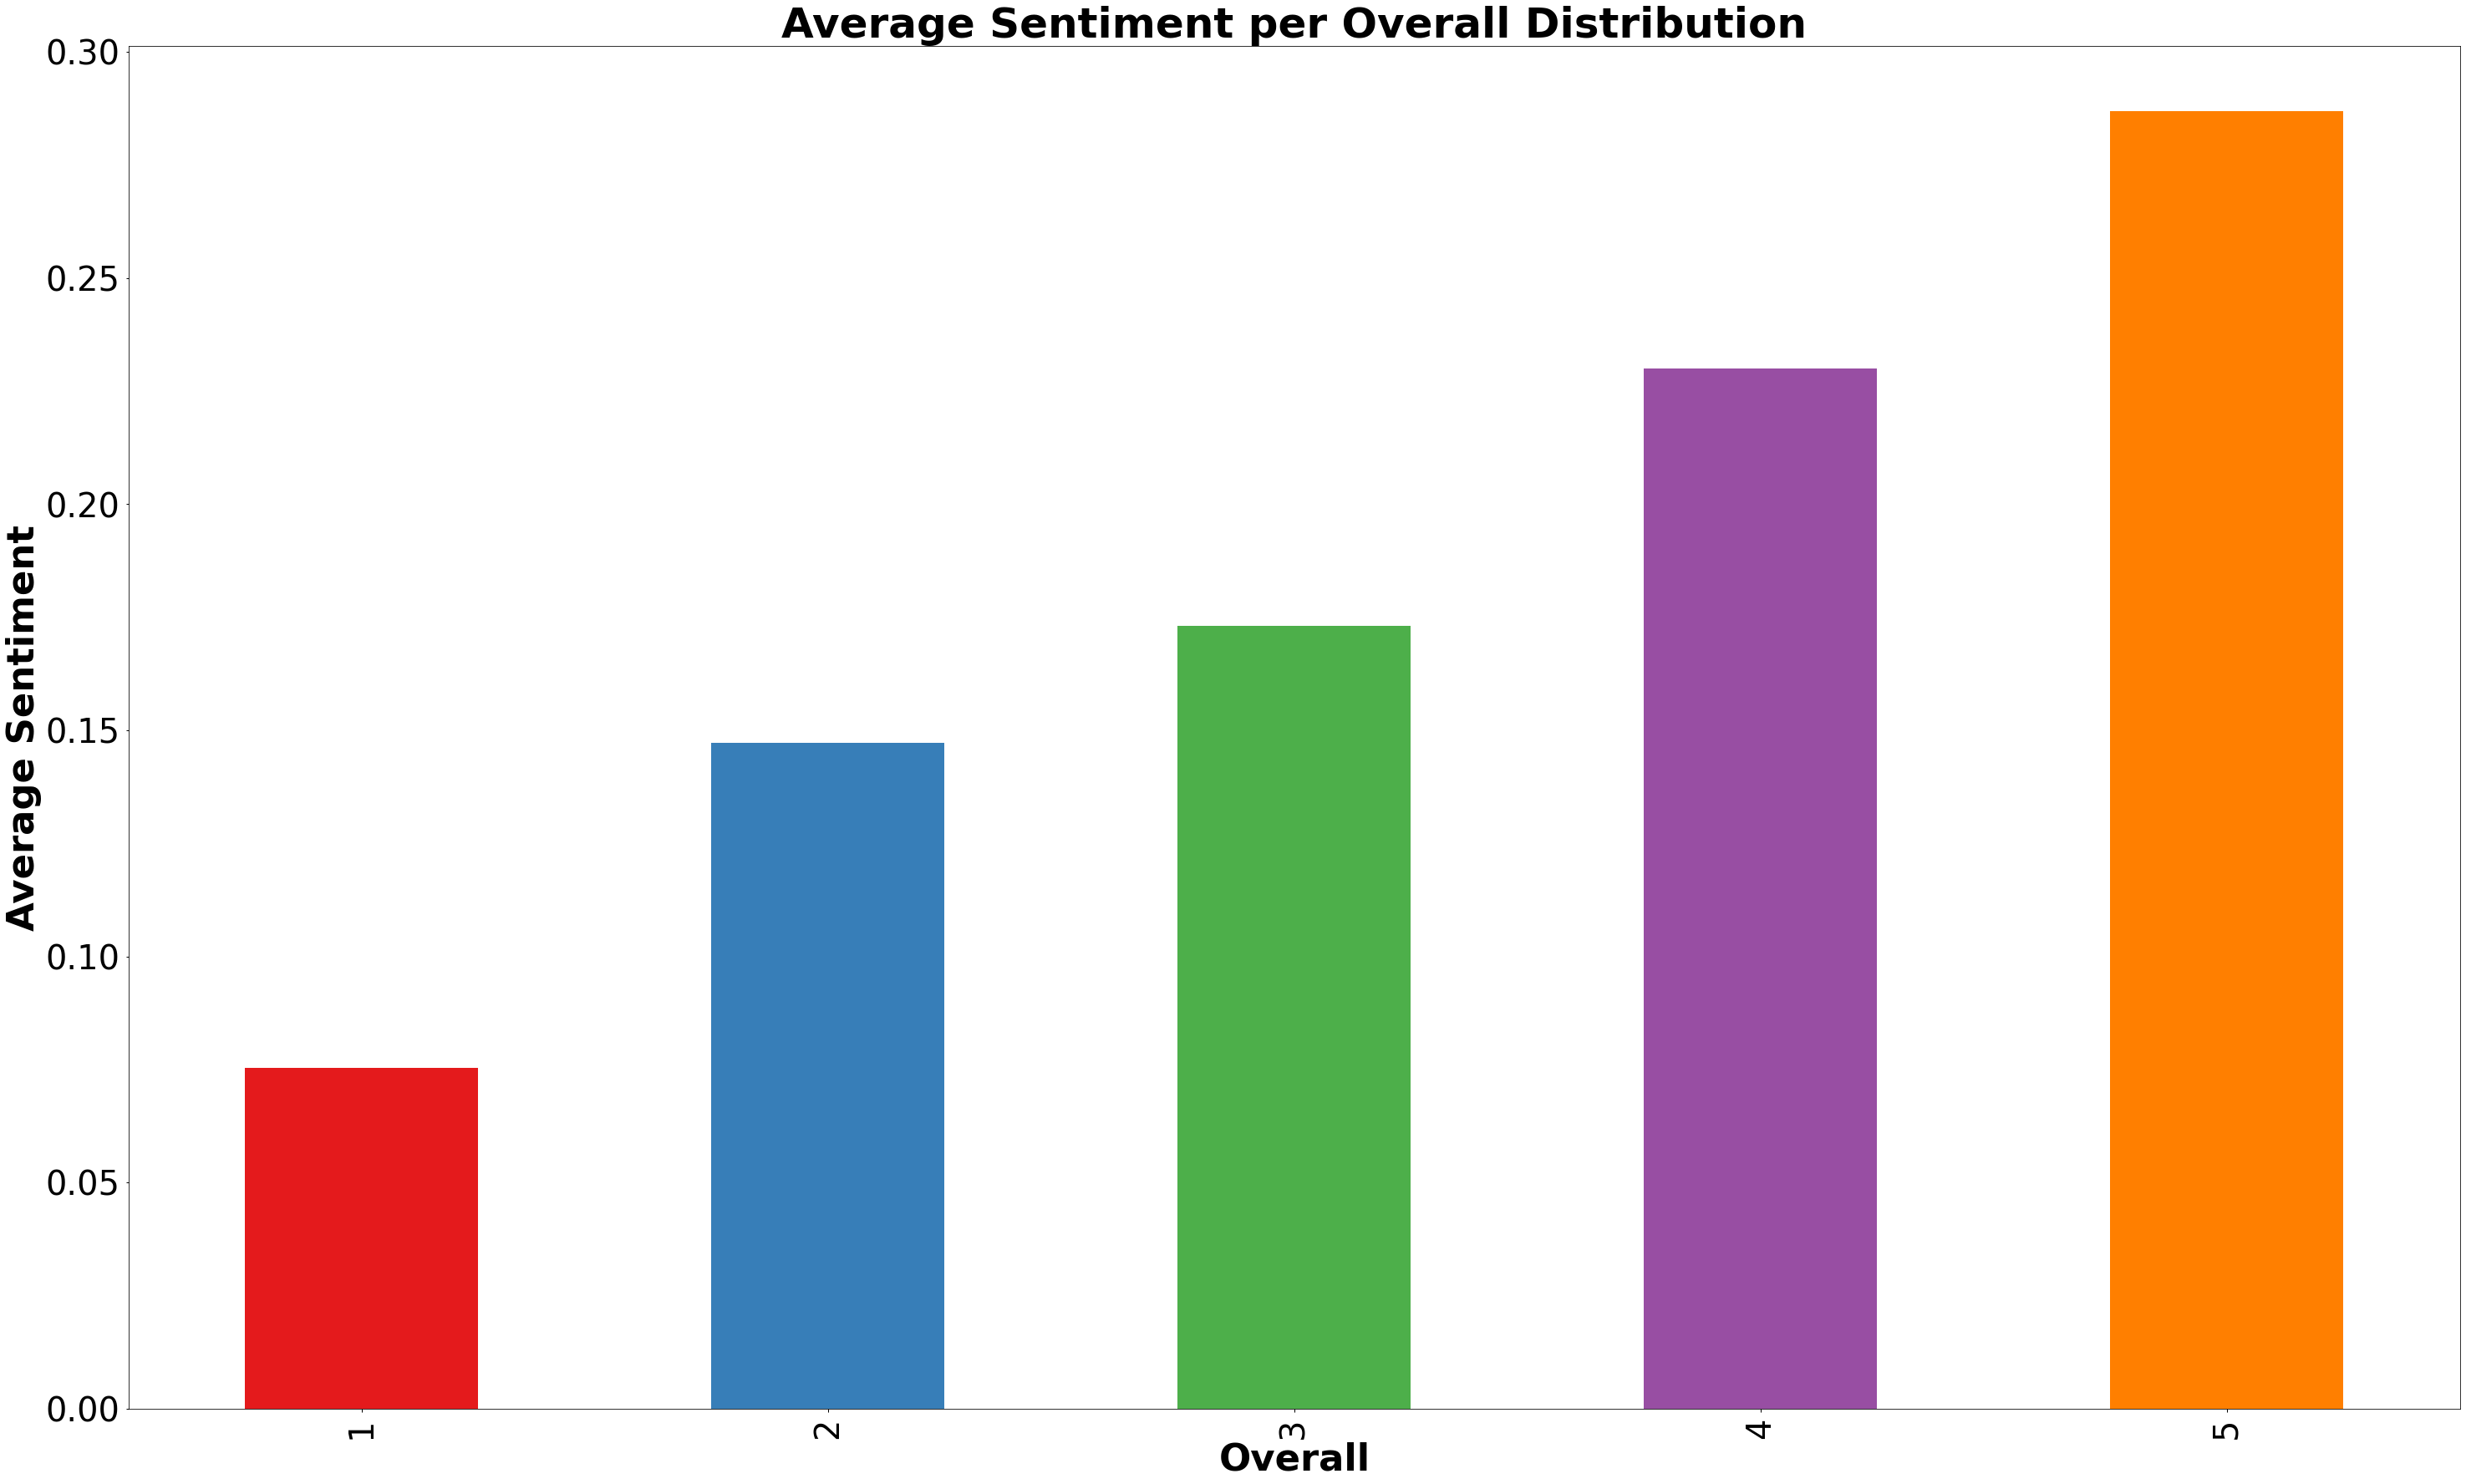

In [93]:
col_map = plt.get_cmap('Set1')
polarity_avg = df_analysis.groupby('overall')['sentiment_lematized'].mean().plot(kind='bar',color=col_map.colors,figsize=(50,30))
plt.xlabel('Overall',weight="bold", fontsize=45)
plt.ylabel('Average Sentiment',weight="bold", fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Overall Distribution',weight="bold", fontsize=50)
plt.show()

#The sentiment increases as ratings increase


In [94]:
# create a new feature for length of the review
df_analysis['review_len'] = df_analysis['lemma_str'].astype(str).apply(len)

In [95]:
# Create a new feature for the word count fo the review
df_analysis['word_count'] = df_analysis['lemmatized'].apply(lambda x: len(str(x).split()))

In [96]:
df_analysis

,sentiment,overall,lemmatized,lemma_str,sentiment_lematized,review_len,word_count
0,Positive,5,"[tuner, affordable, work, well, purchase, six, far, sturdy, come, battery, box, install, actuall...",tuner affordable work well purchase six far sturdy come battery box install actually sat one tho...,0.202306,696,115
1,Positive,5,"[simple, operate, make, well, bargaintasticif, know, noise, gate, suppose, think, might, need, o...",simple operate make well bargaintasticif know noise gate suppose think might need one highly rec...,0.090000,309,50
2,Neutral,3,"[put, gibson, j, increase, bass, ok, j, strength, ruin, wonderful, clarity, balance, guitar, als...",put gibson j increase bass ok j strength ruin wonderful clarity balance guitar also take little ...,0.158690,473,80
3,Neutral,3,"[oh, crybaby, crybaby, wah, suck, crybaby, tire, hearing, statement, guitarist, fresh, even, tel...",oh crybaby crybaby wah suck crybaby tire hearing statement guitarist fresh even tell many string...,0.203992,1214,205
4,Positive,4,"[microphone, amazon, may, best, mic, home, studio, one, mark, spot, get, budget]",microphone amazon may best mic home studio one mark spot get budget,1.000000,67,12
...,...,...,...,...,...,...,...
10256,Positive,4,"[great, foot, rest]",great foot rest,0.800000,15,3
10257,Positive,5,"[would, must, twice, price]",would must twice price,0.000000,22,4
10258,Positive,5,"[make, sound, like, pro]",make sound like pro,0.400000,19,4
10259,Positive,5,"[power, sound, sound, great]",power sound sound great,0.533333,23,4


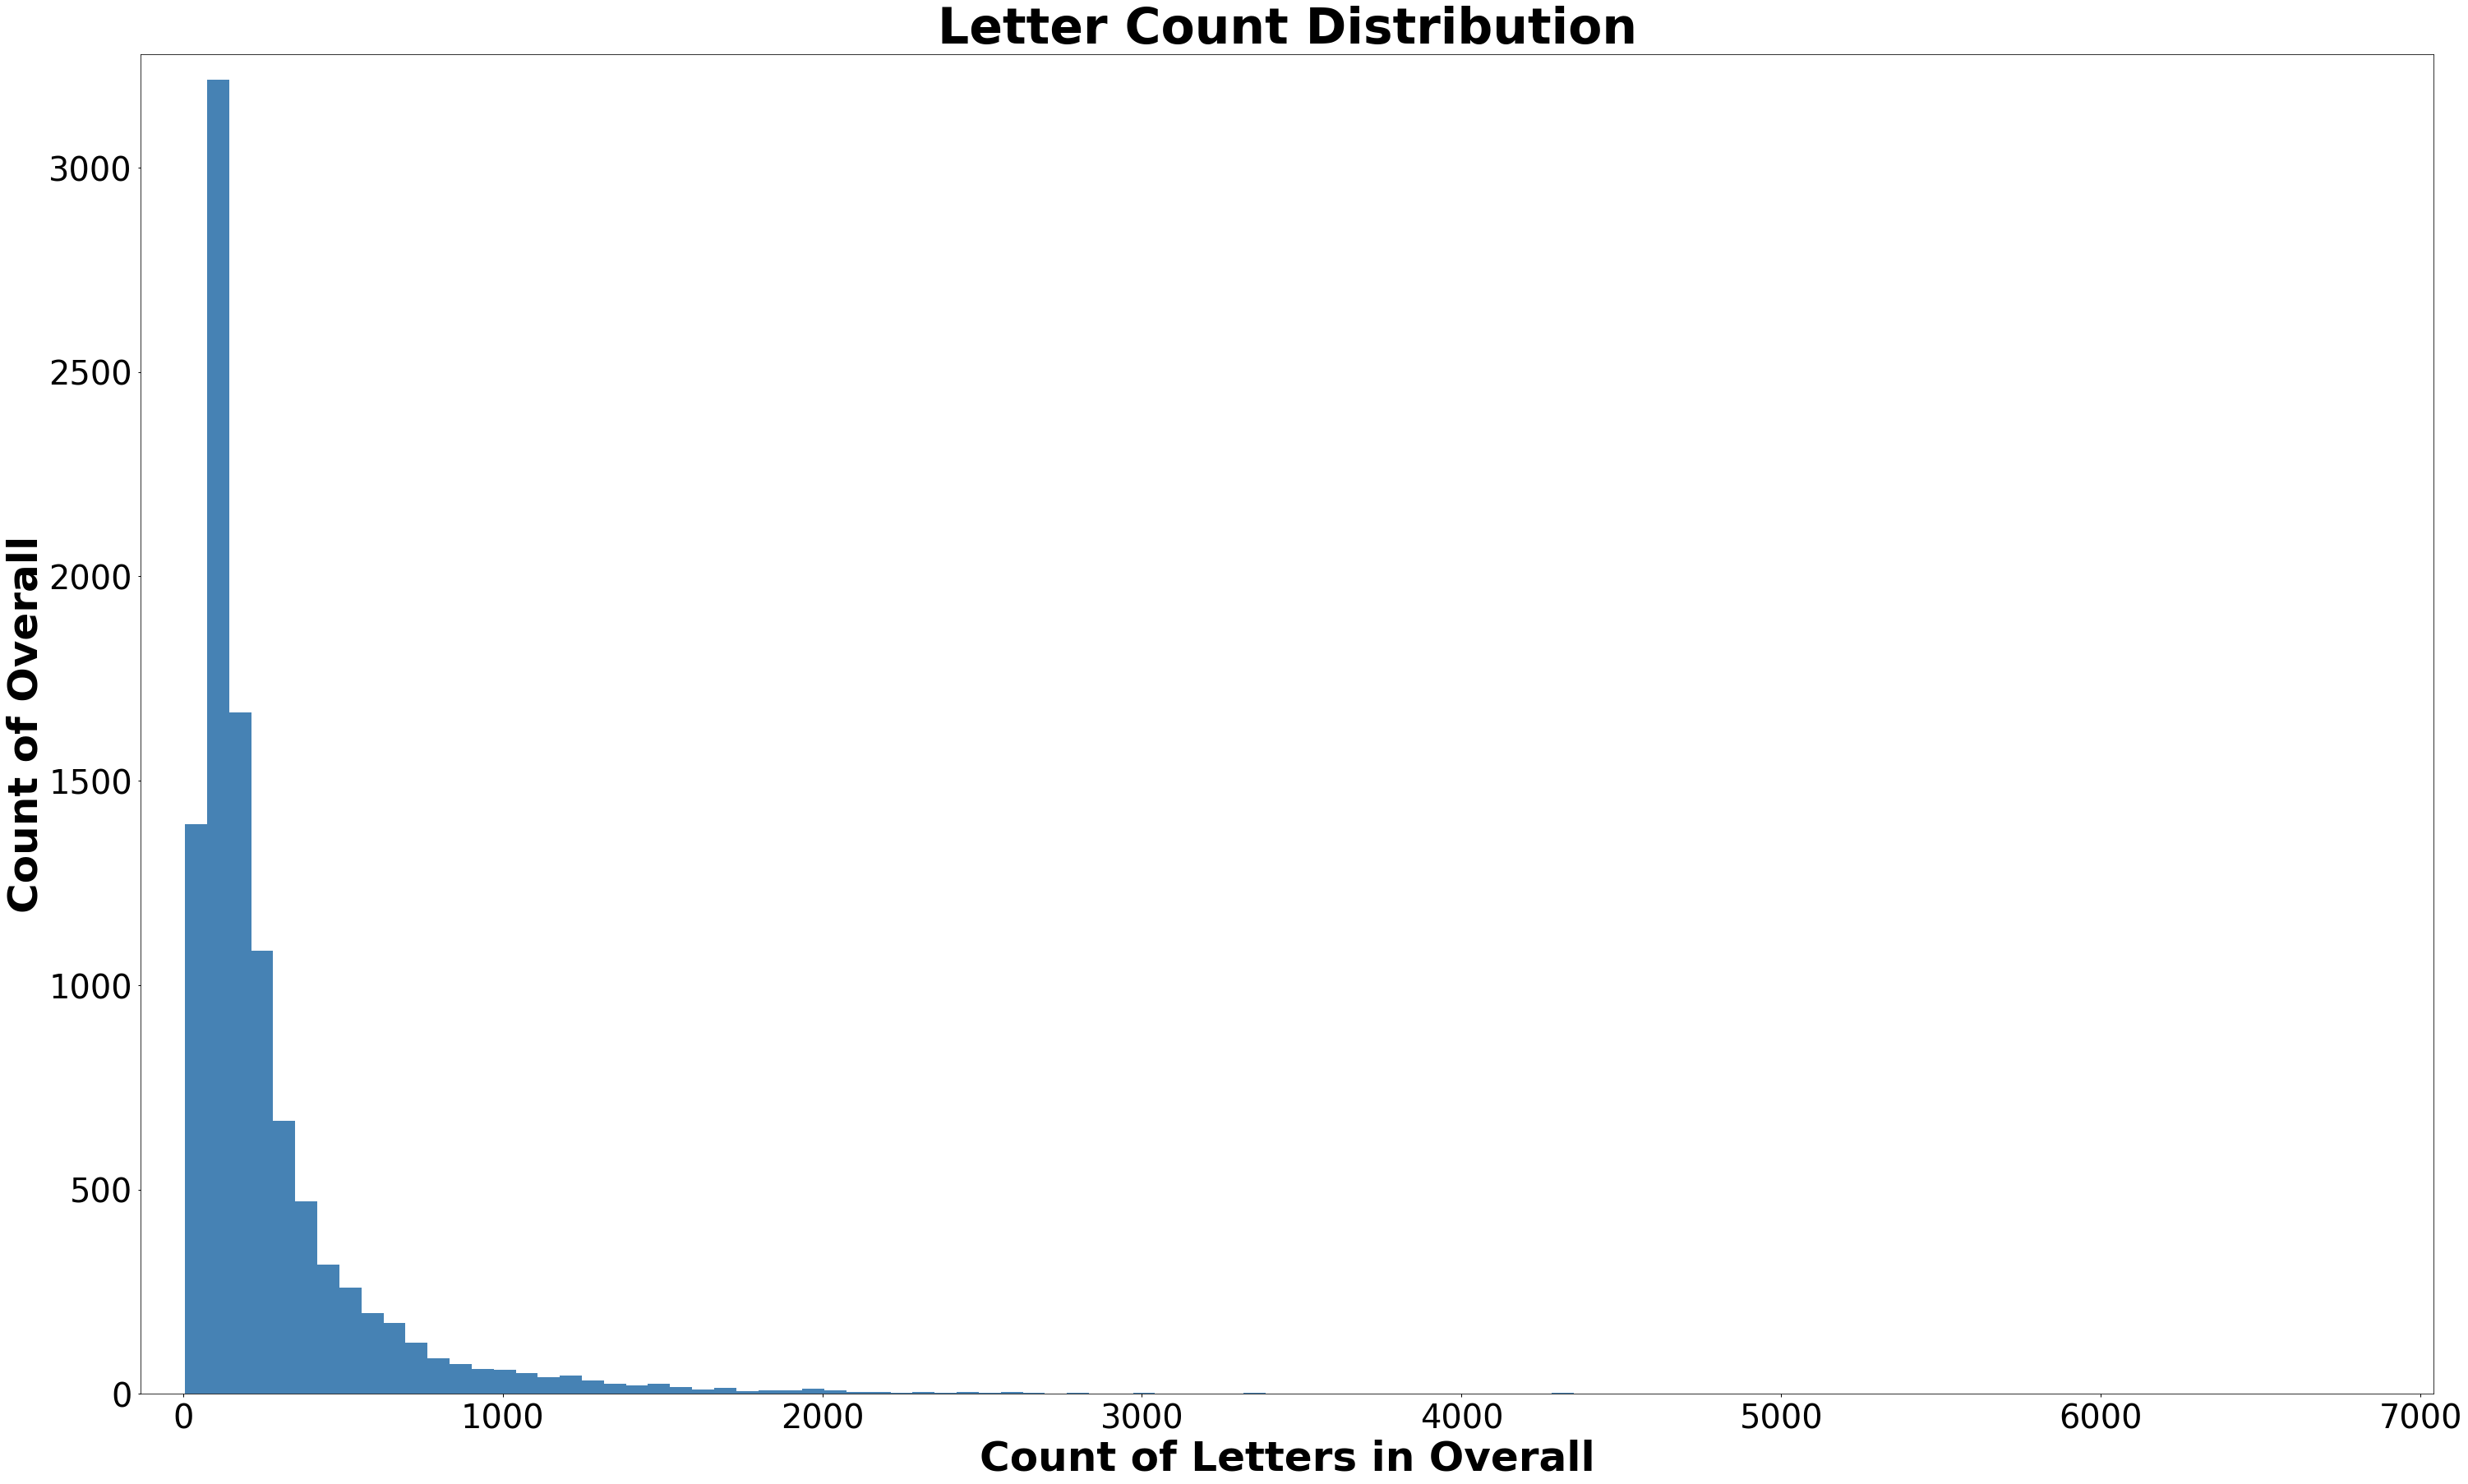

In [97]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Letters in Overall', weight="bold",fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Count of Overall', weight="bold",fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df_analysis['review_len'], bins=100,color="steelblue")
plt.title('Letter Count Distribution',weight="bold", fontsize=60)
plt.show()


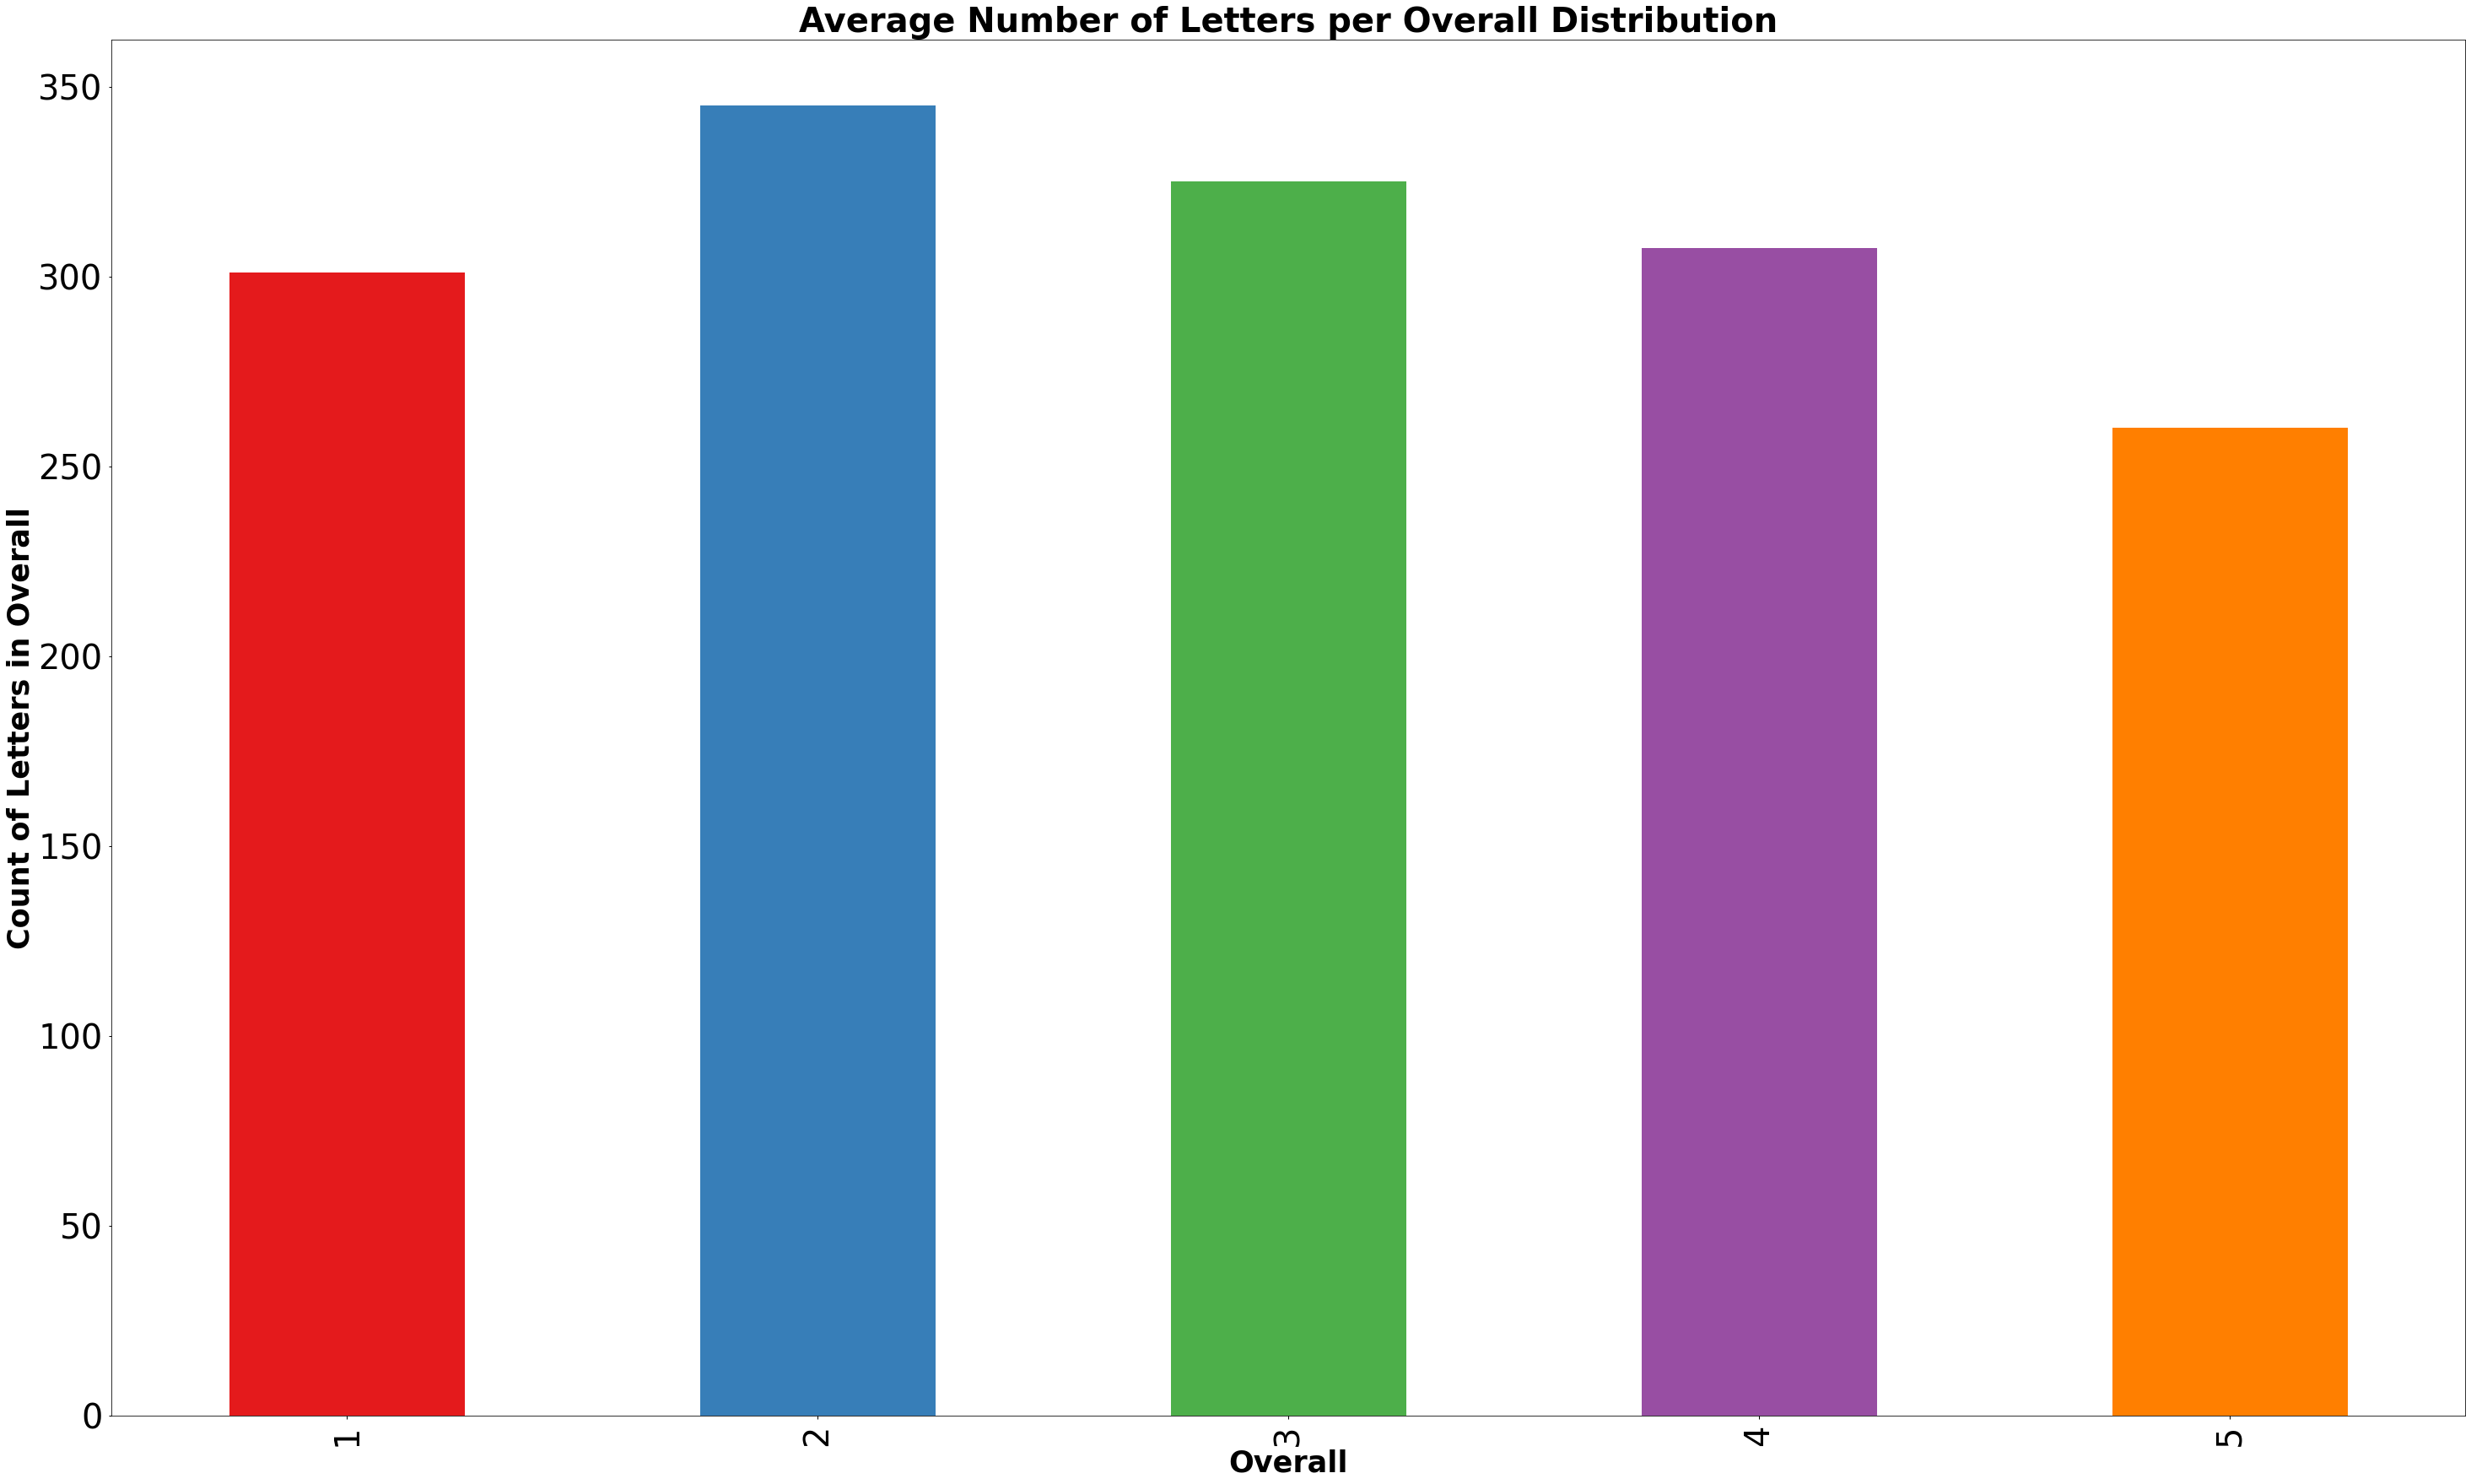

In [98]:
col_map = plt.get_cmap('Set1')
letter_avg = df_analysis.groupby('overall')['review_len'].mean().plot(kind='bar',color=col_map.colors, figsize=(50,30))
plt.xlabel('Overall', weight="bold",fontsize=35)
plt.ylabel('Count of Letters in Overall',weight="bold", fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Overall Distribution',weight="bold", fontsize=40)
plt.show()

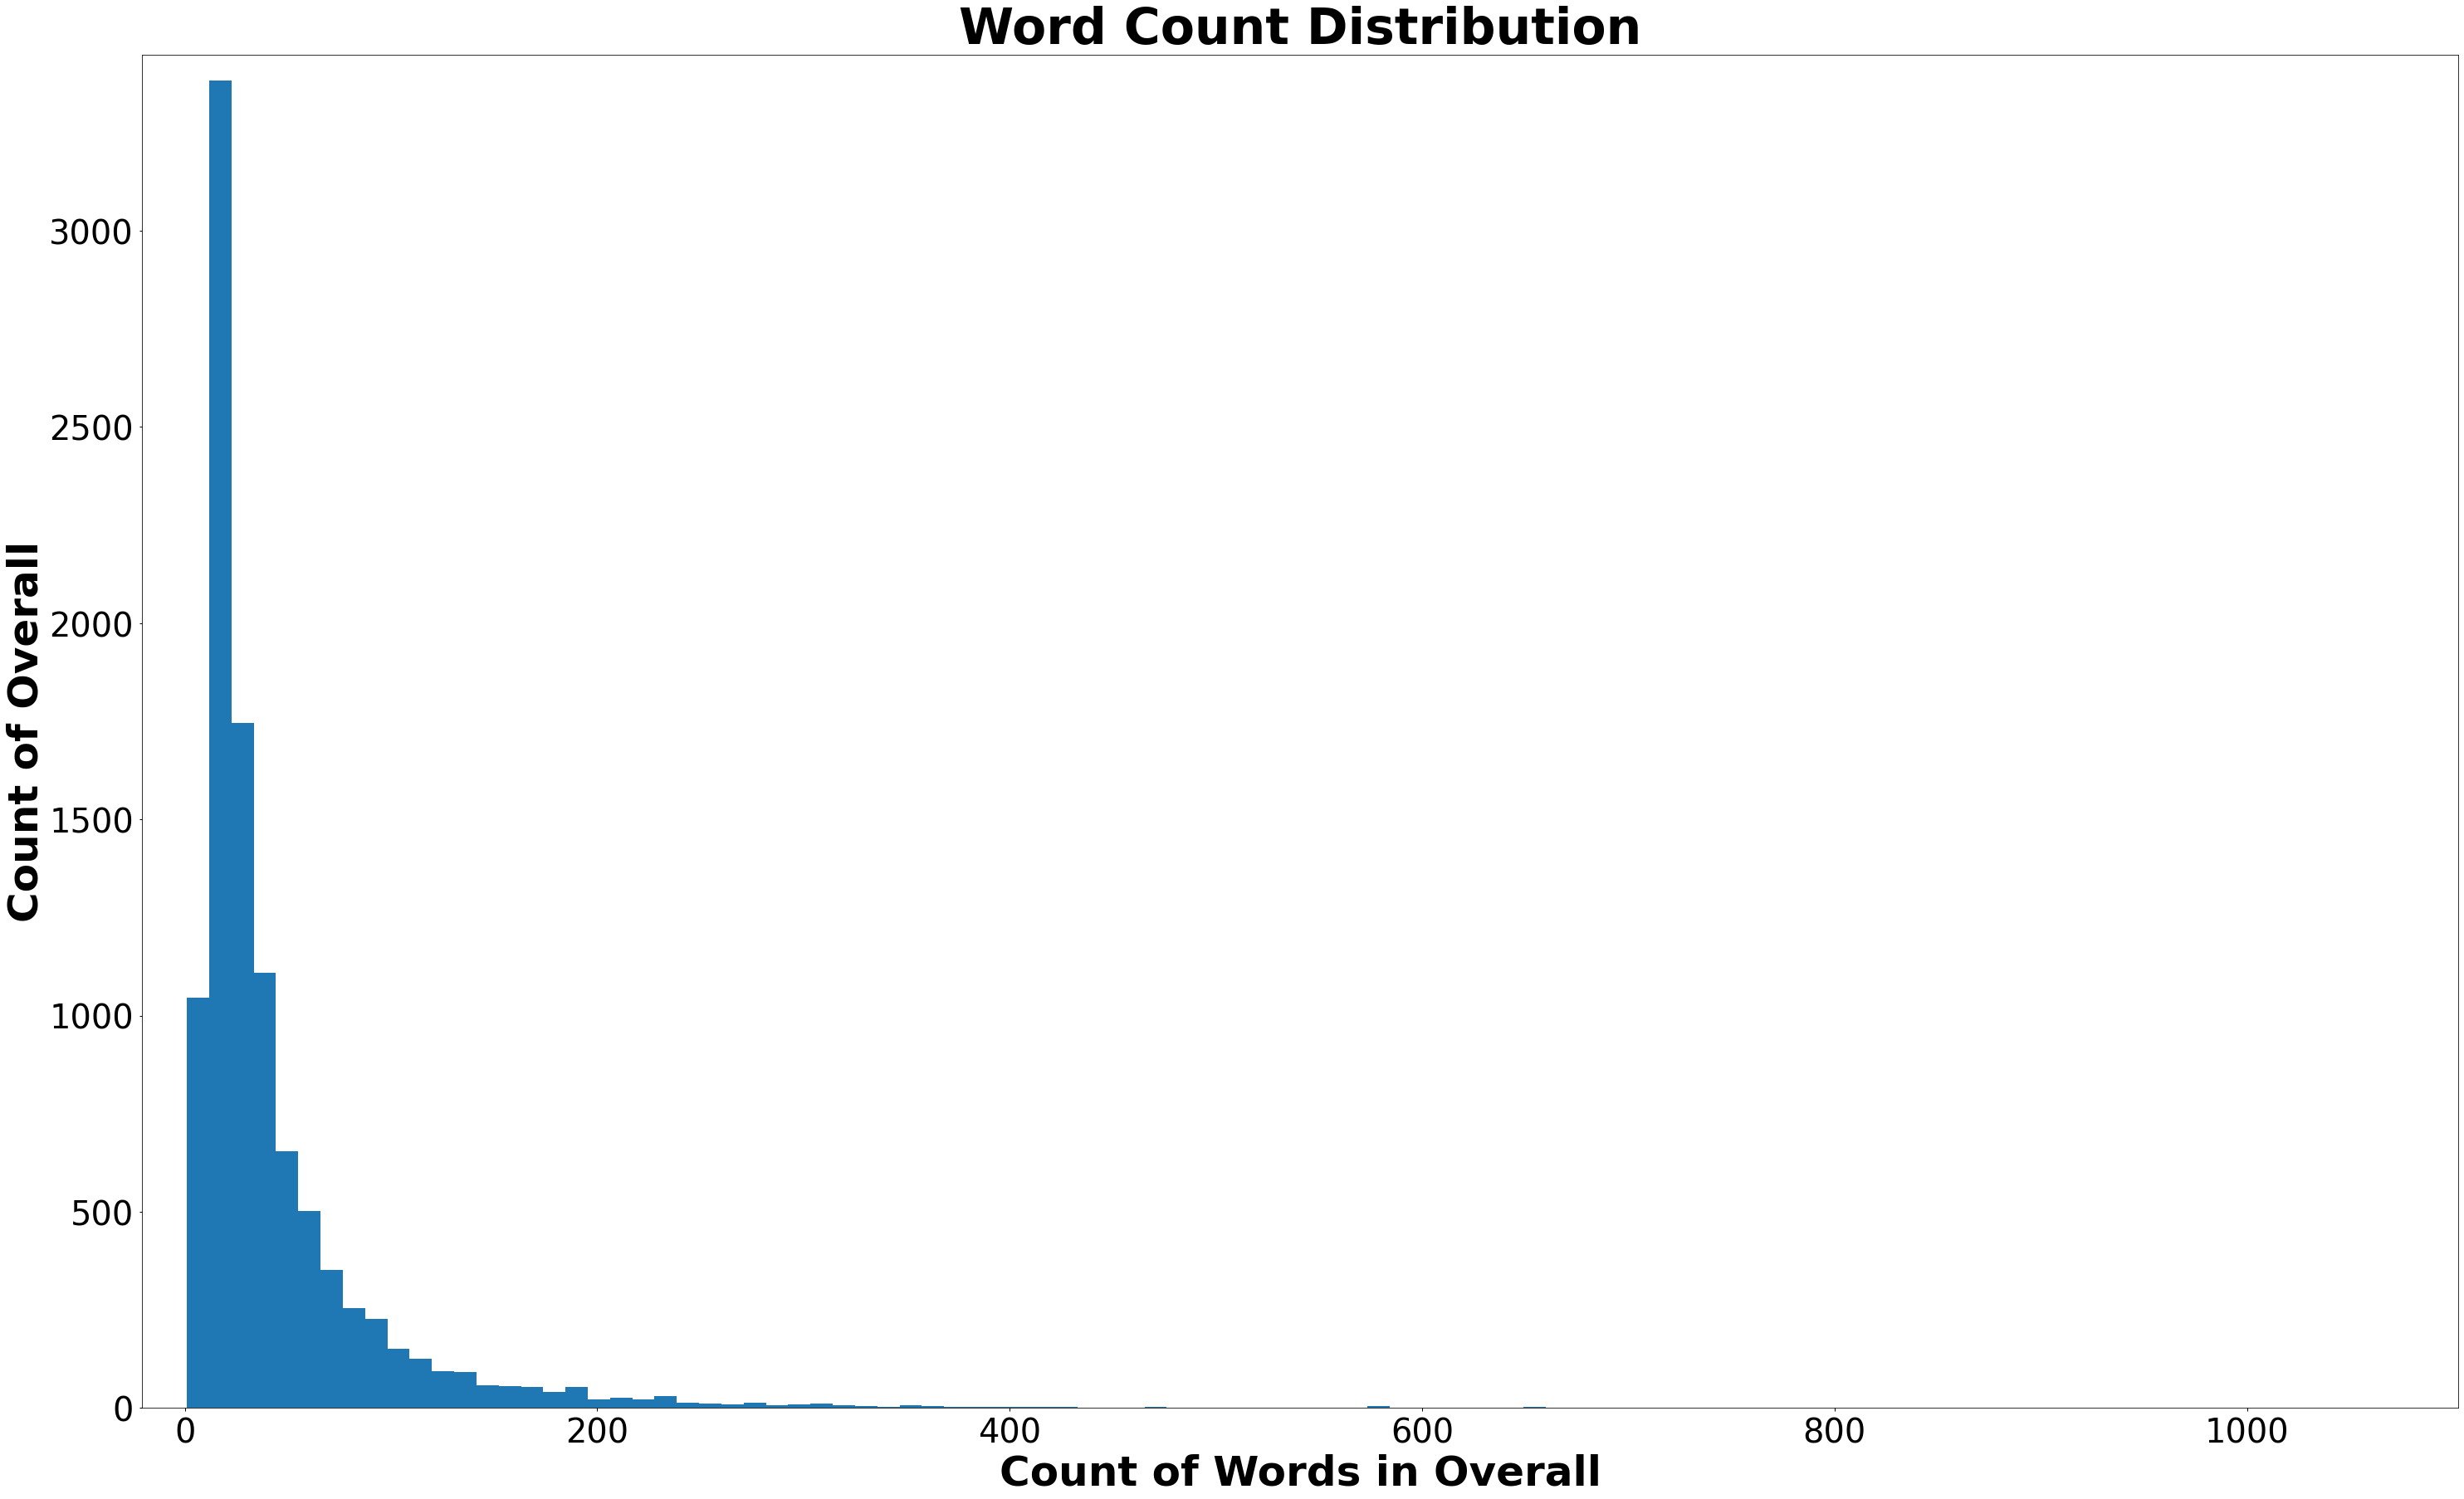

In [99]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Words in Overall',weight="bold", fontsize=50)
plt.ylabel('Count of Overall',weight="bold", fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.hist(df_analysis['word_count'], bins=100)
plt.title('Word Count Distribution',weight="bold", fontsize=60)
plt.show()

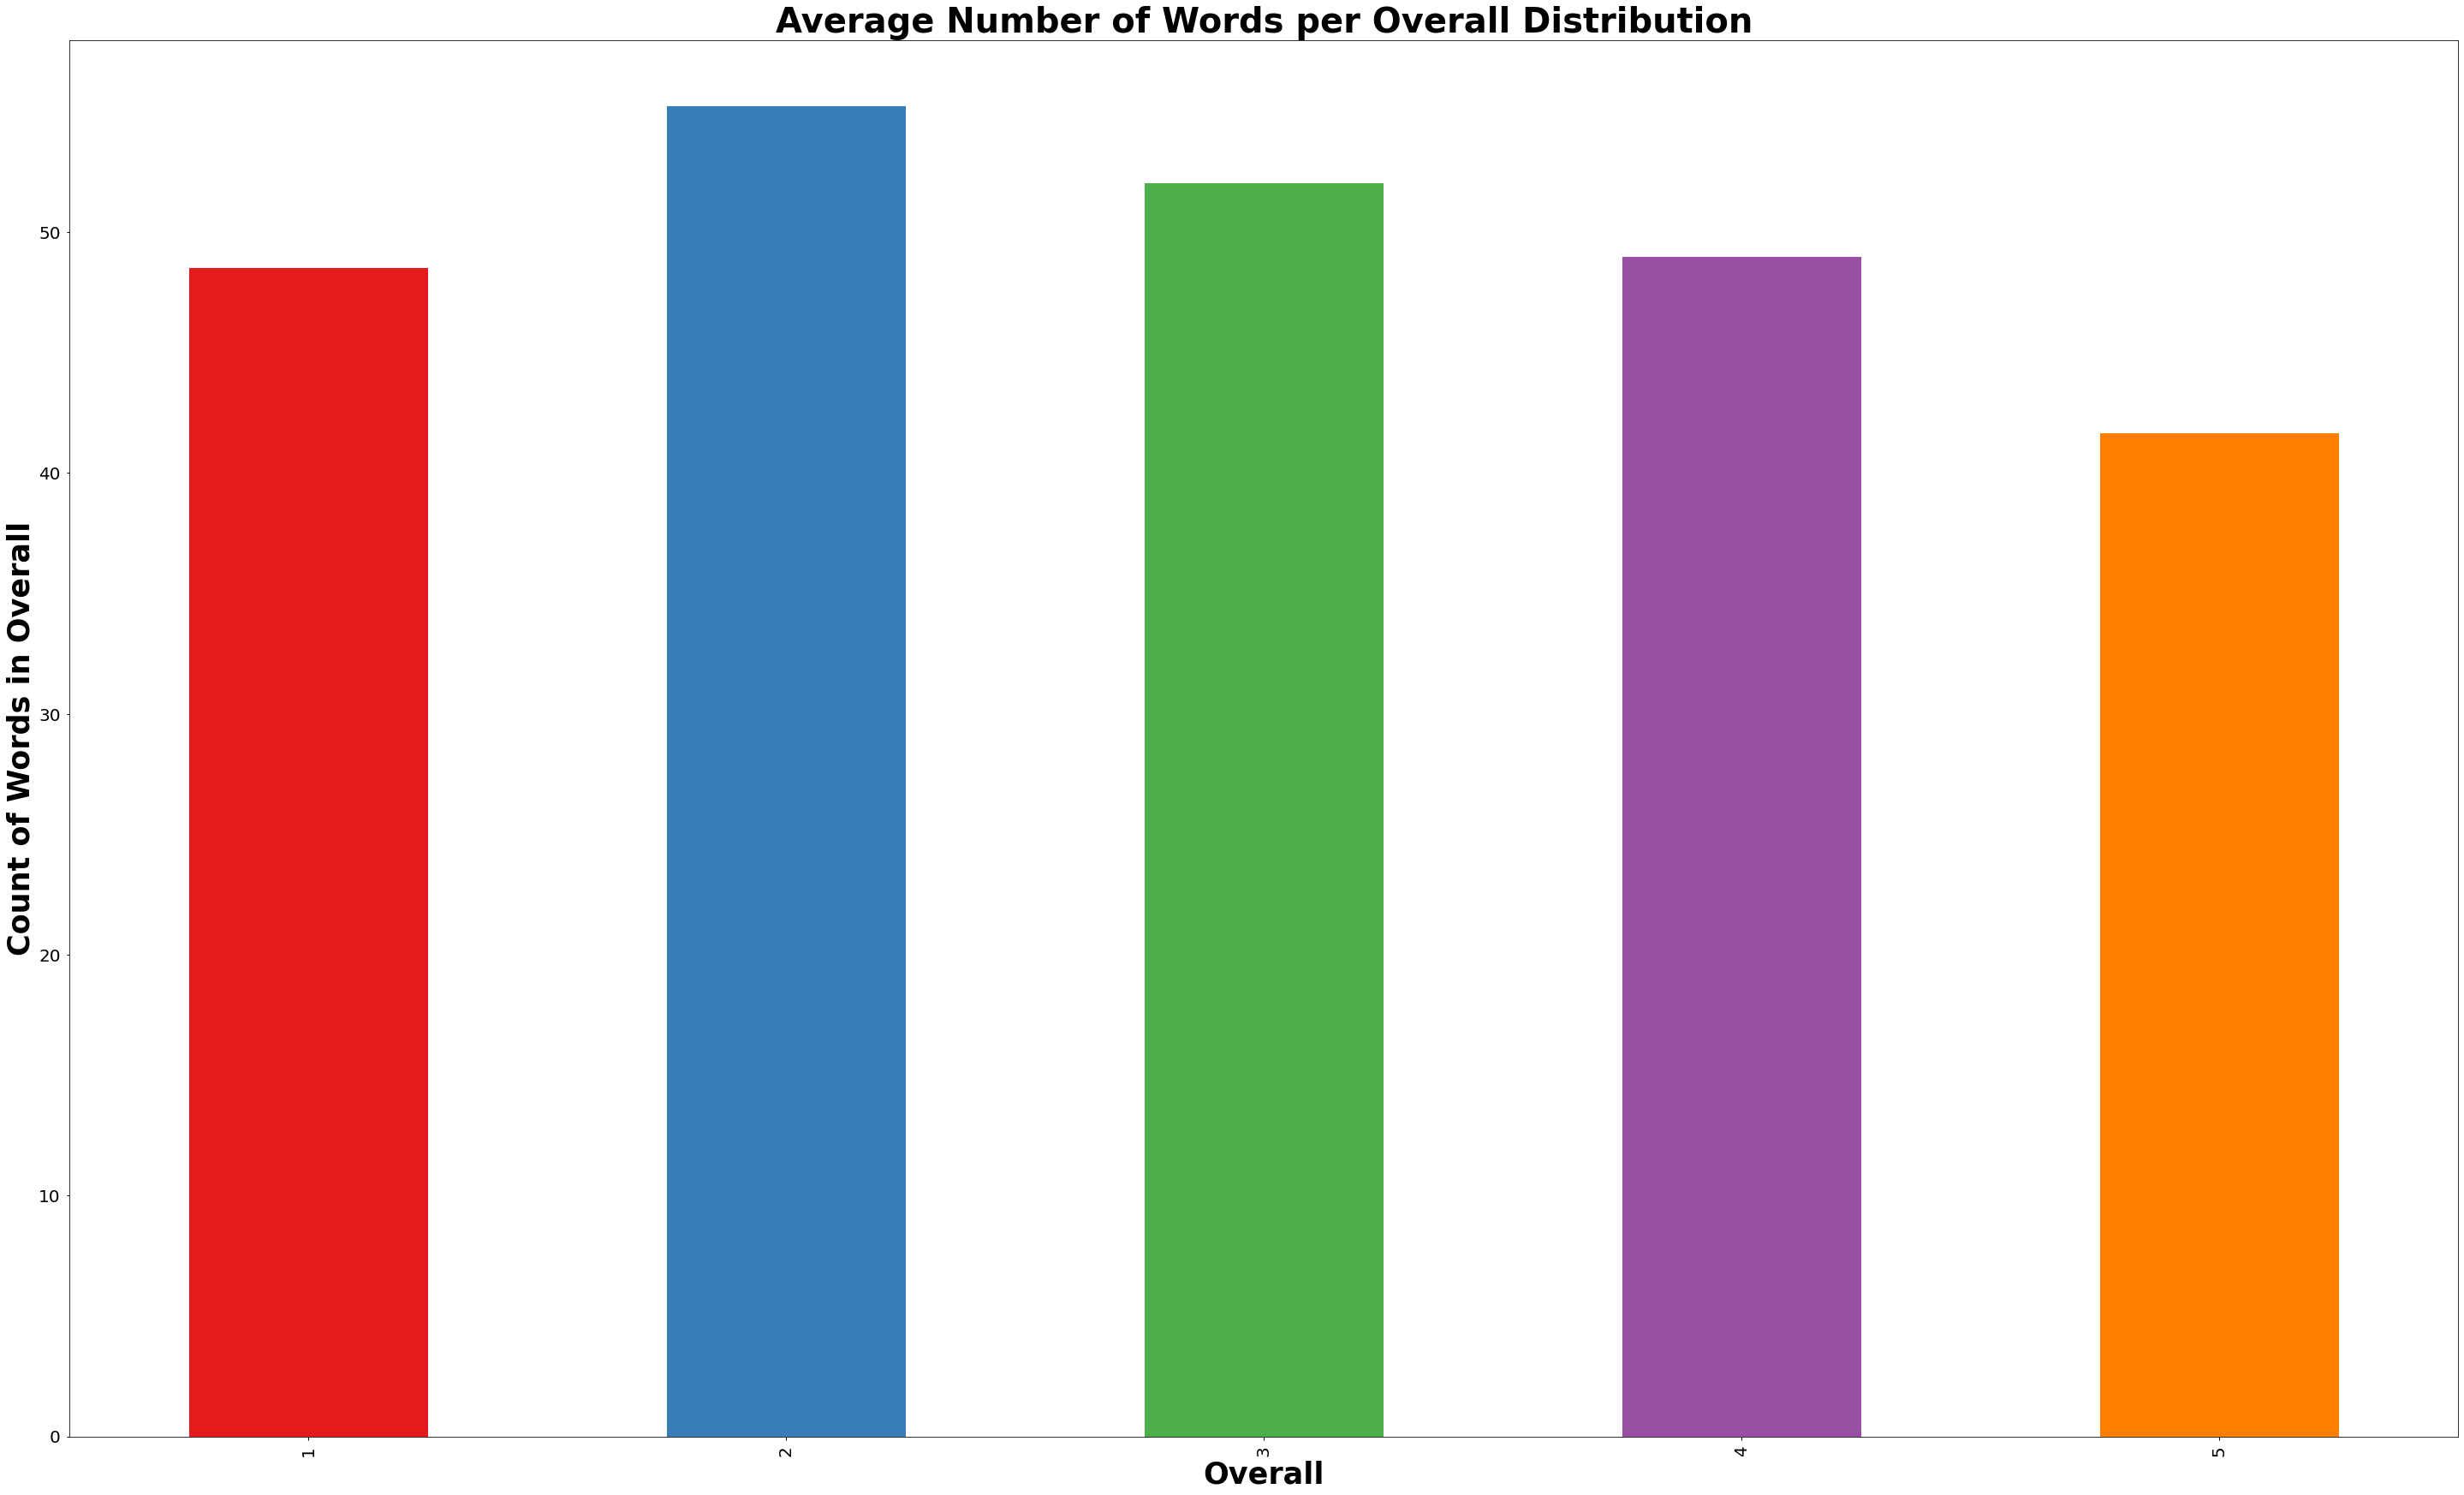

In [100]:
col_map = plt.get_cmap('Set1')
word_avg = df_analysis.groupby('overall')['word_count'].mean().plot(kind='bar',color=col_map.colors,figsize=(50,30))
plt.xlabel('Overall',weight="bold", fontsize=35)
plt.ylabel('Count of Words in Overall',weight="bold", fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average Number of Words per Overall Distribution',weight="bold", fontsize=40)
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


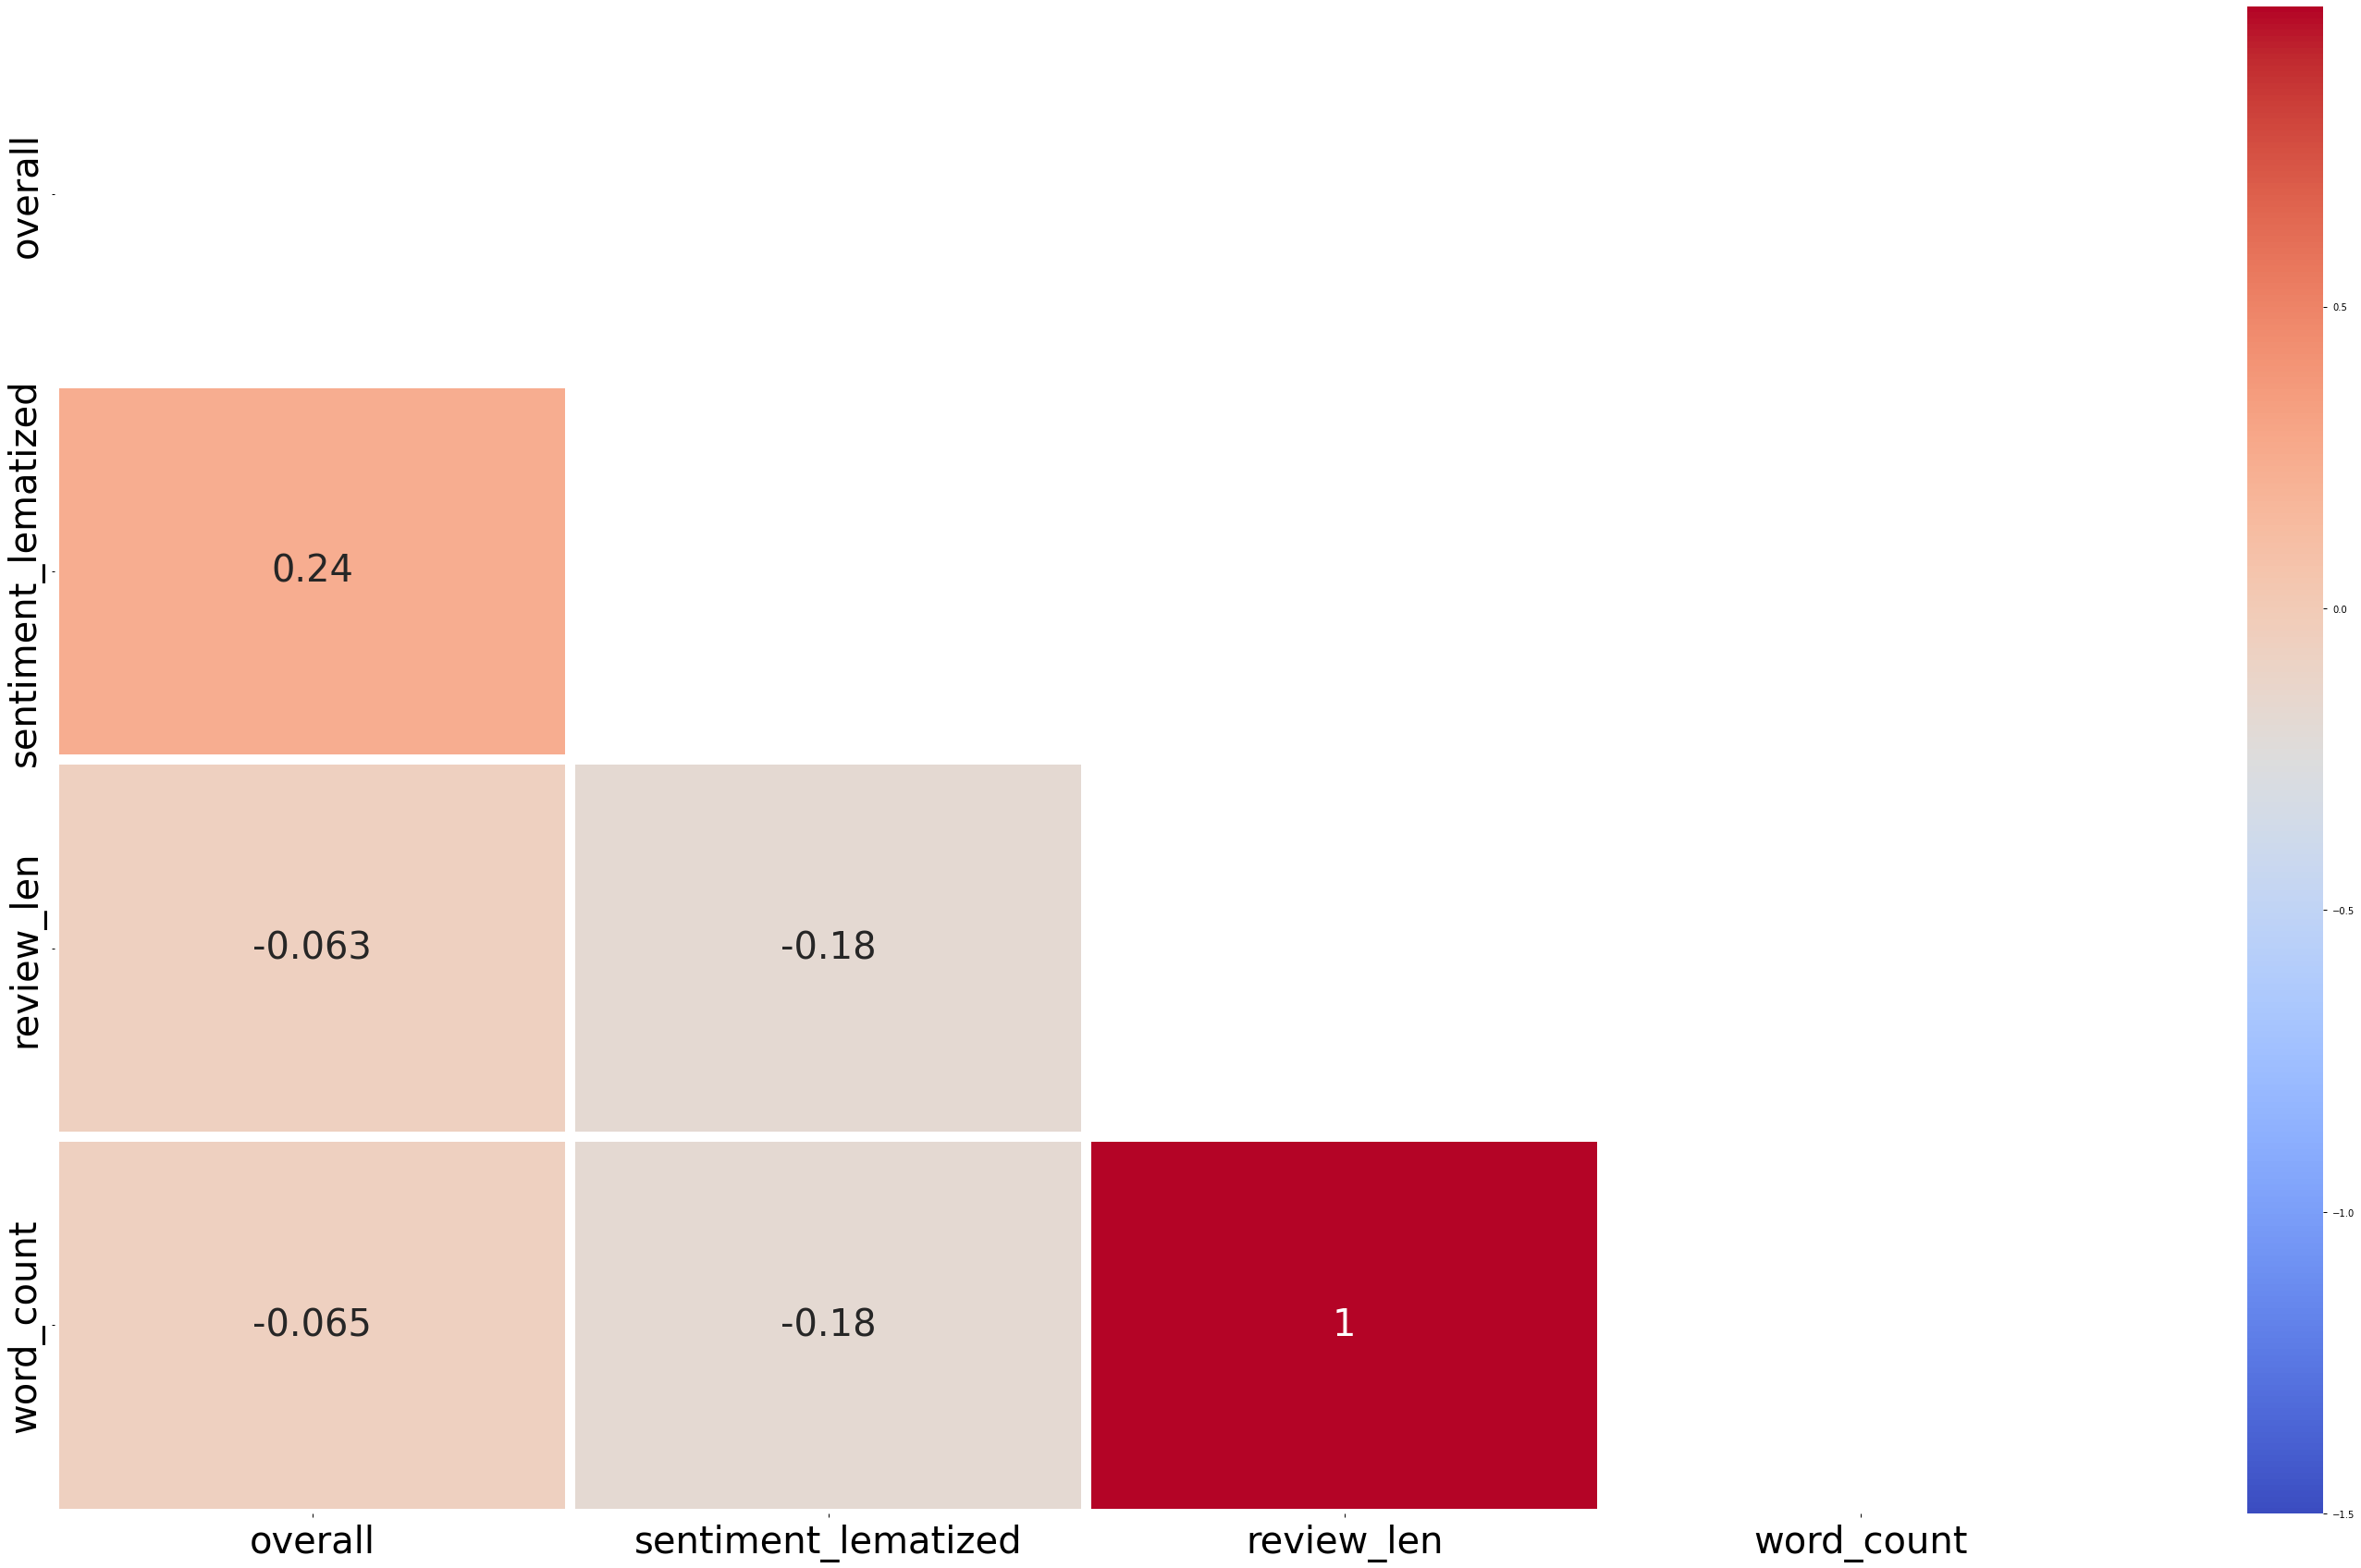

In [101]:
correlation = df_analysis[['overall','sentiment_lematized', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

# Word Frequencies

In [102]:
words = df_analysis['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

In [103]:
mostcommon = FreqDist(allwords).most_common(100)

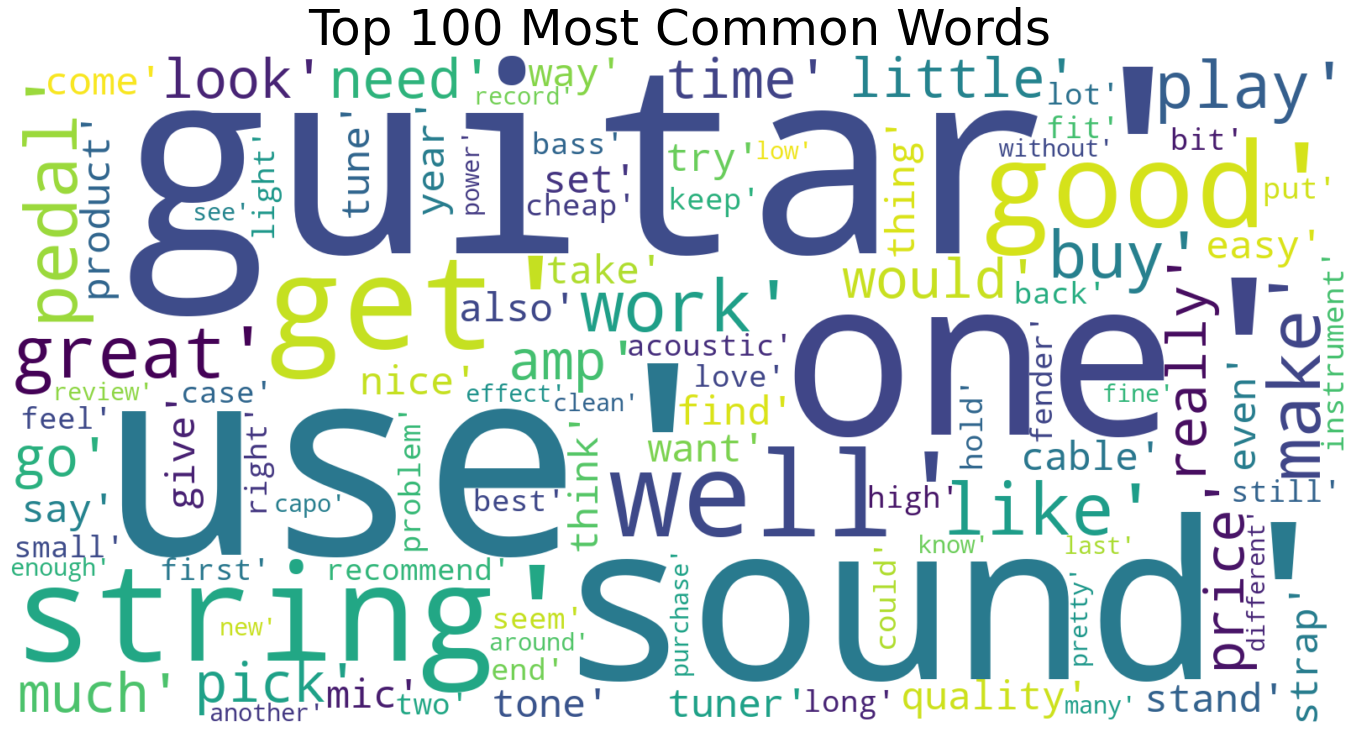

In [104]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50,c="black")

plt.tight_layout(pad=0)
plt.show()

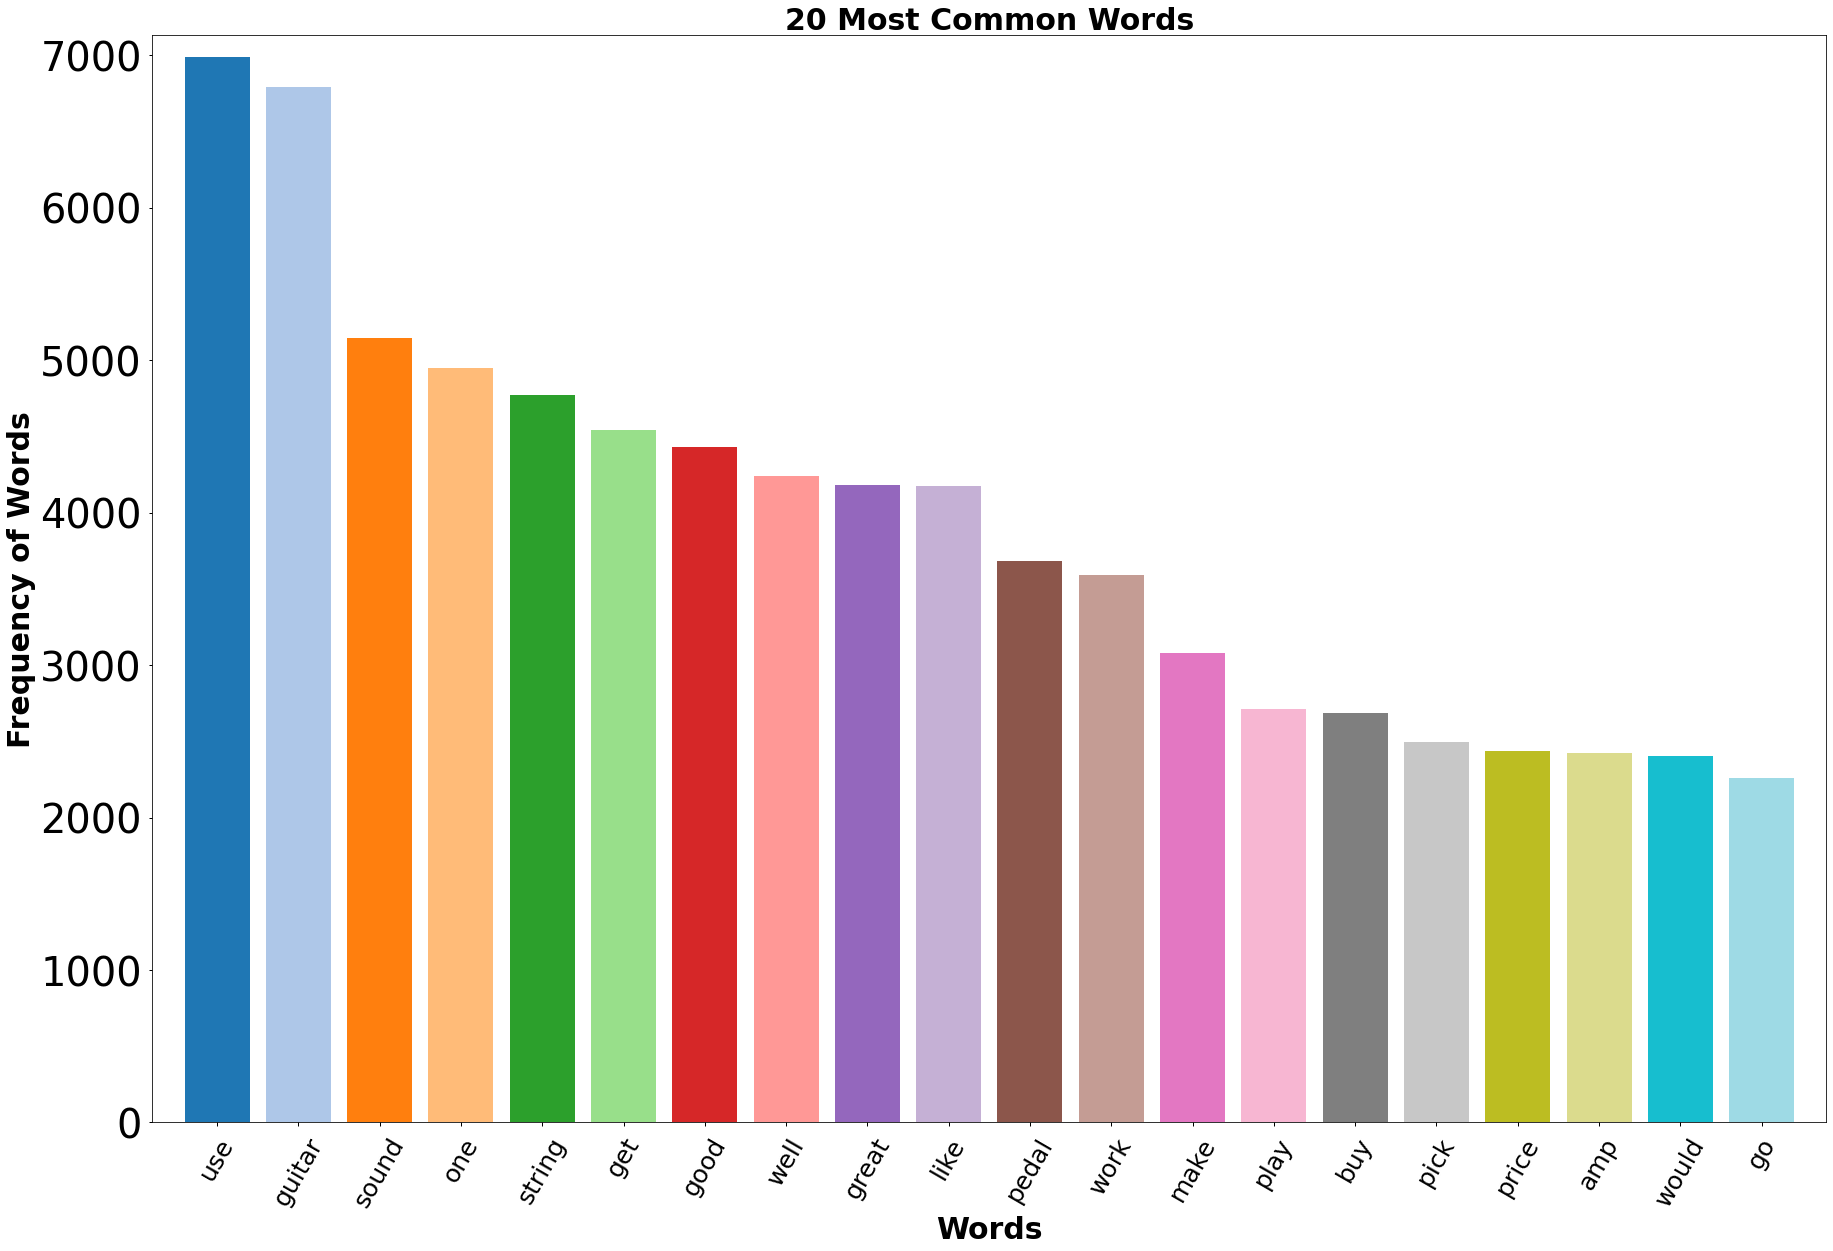

In [105]:
mostcommon_small = FreqDist(allwords).most_common(20)
x, y = zip(*mostcommon_small)
# create a figure
plt.figure(figsize=(30,20))
col_map = plt.get_cmap('tab20')

plt.margins(0.02)
plt.bar(x, y,color=col_map.colors)
plt.xlabel('Words',weight="bold", fontsize=30)
plt.ylabel('Frequency of Words',weight="bold", fontsize=30)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=25)
plt.title('20 Most Common Words',weight="bold", fontsize=30)
plt.show()

In [106]:
group_by = df_analysis.groupby('sentiment')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(10))
group_by

sentiment
Negative    [(get, 315), (guitar, 301), (use, 299), (one, 286), (sound, 263), (work, 209), (like, 208), (str...
Neutral     [(use, 631), (guitar, 486), (get, 486), (good, 441), (one, 428), (sound, 381), (string, 376), (l...
Positive    [(use, 6060), (guitar, 6003), (sound, 4498), (one, 4231), (string, 4203), (great, 3892), (good, ...
Name: lemma_str, dtype: object

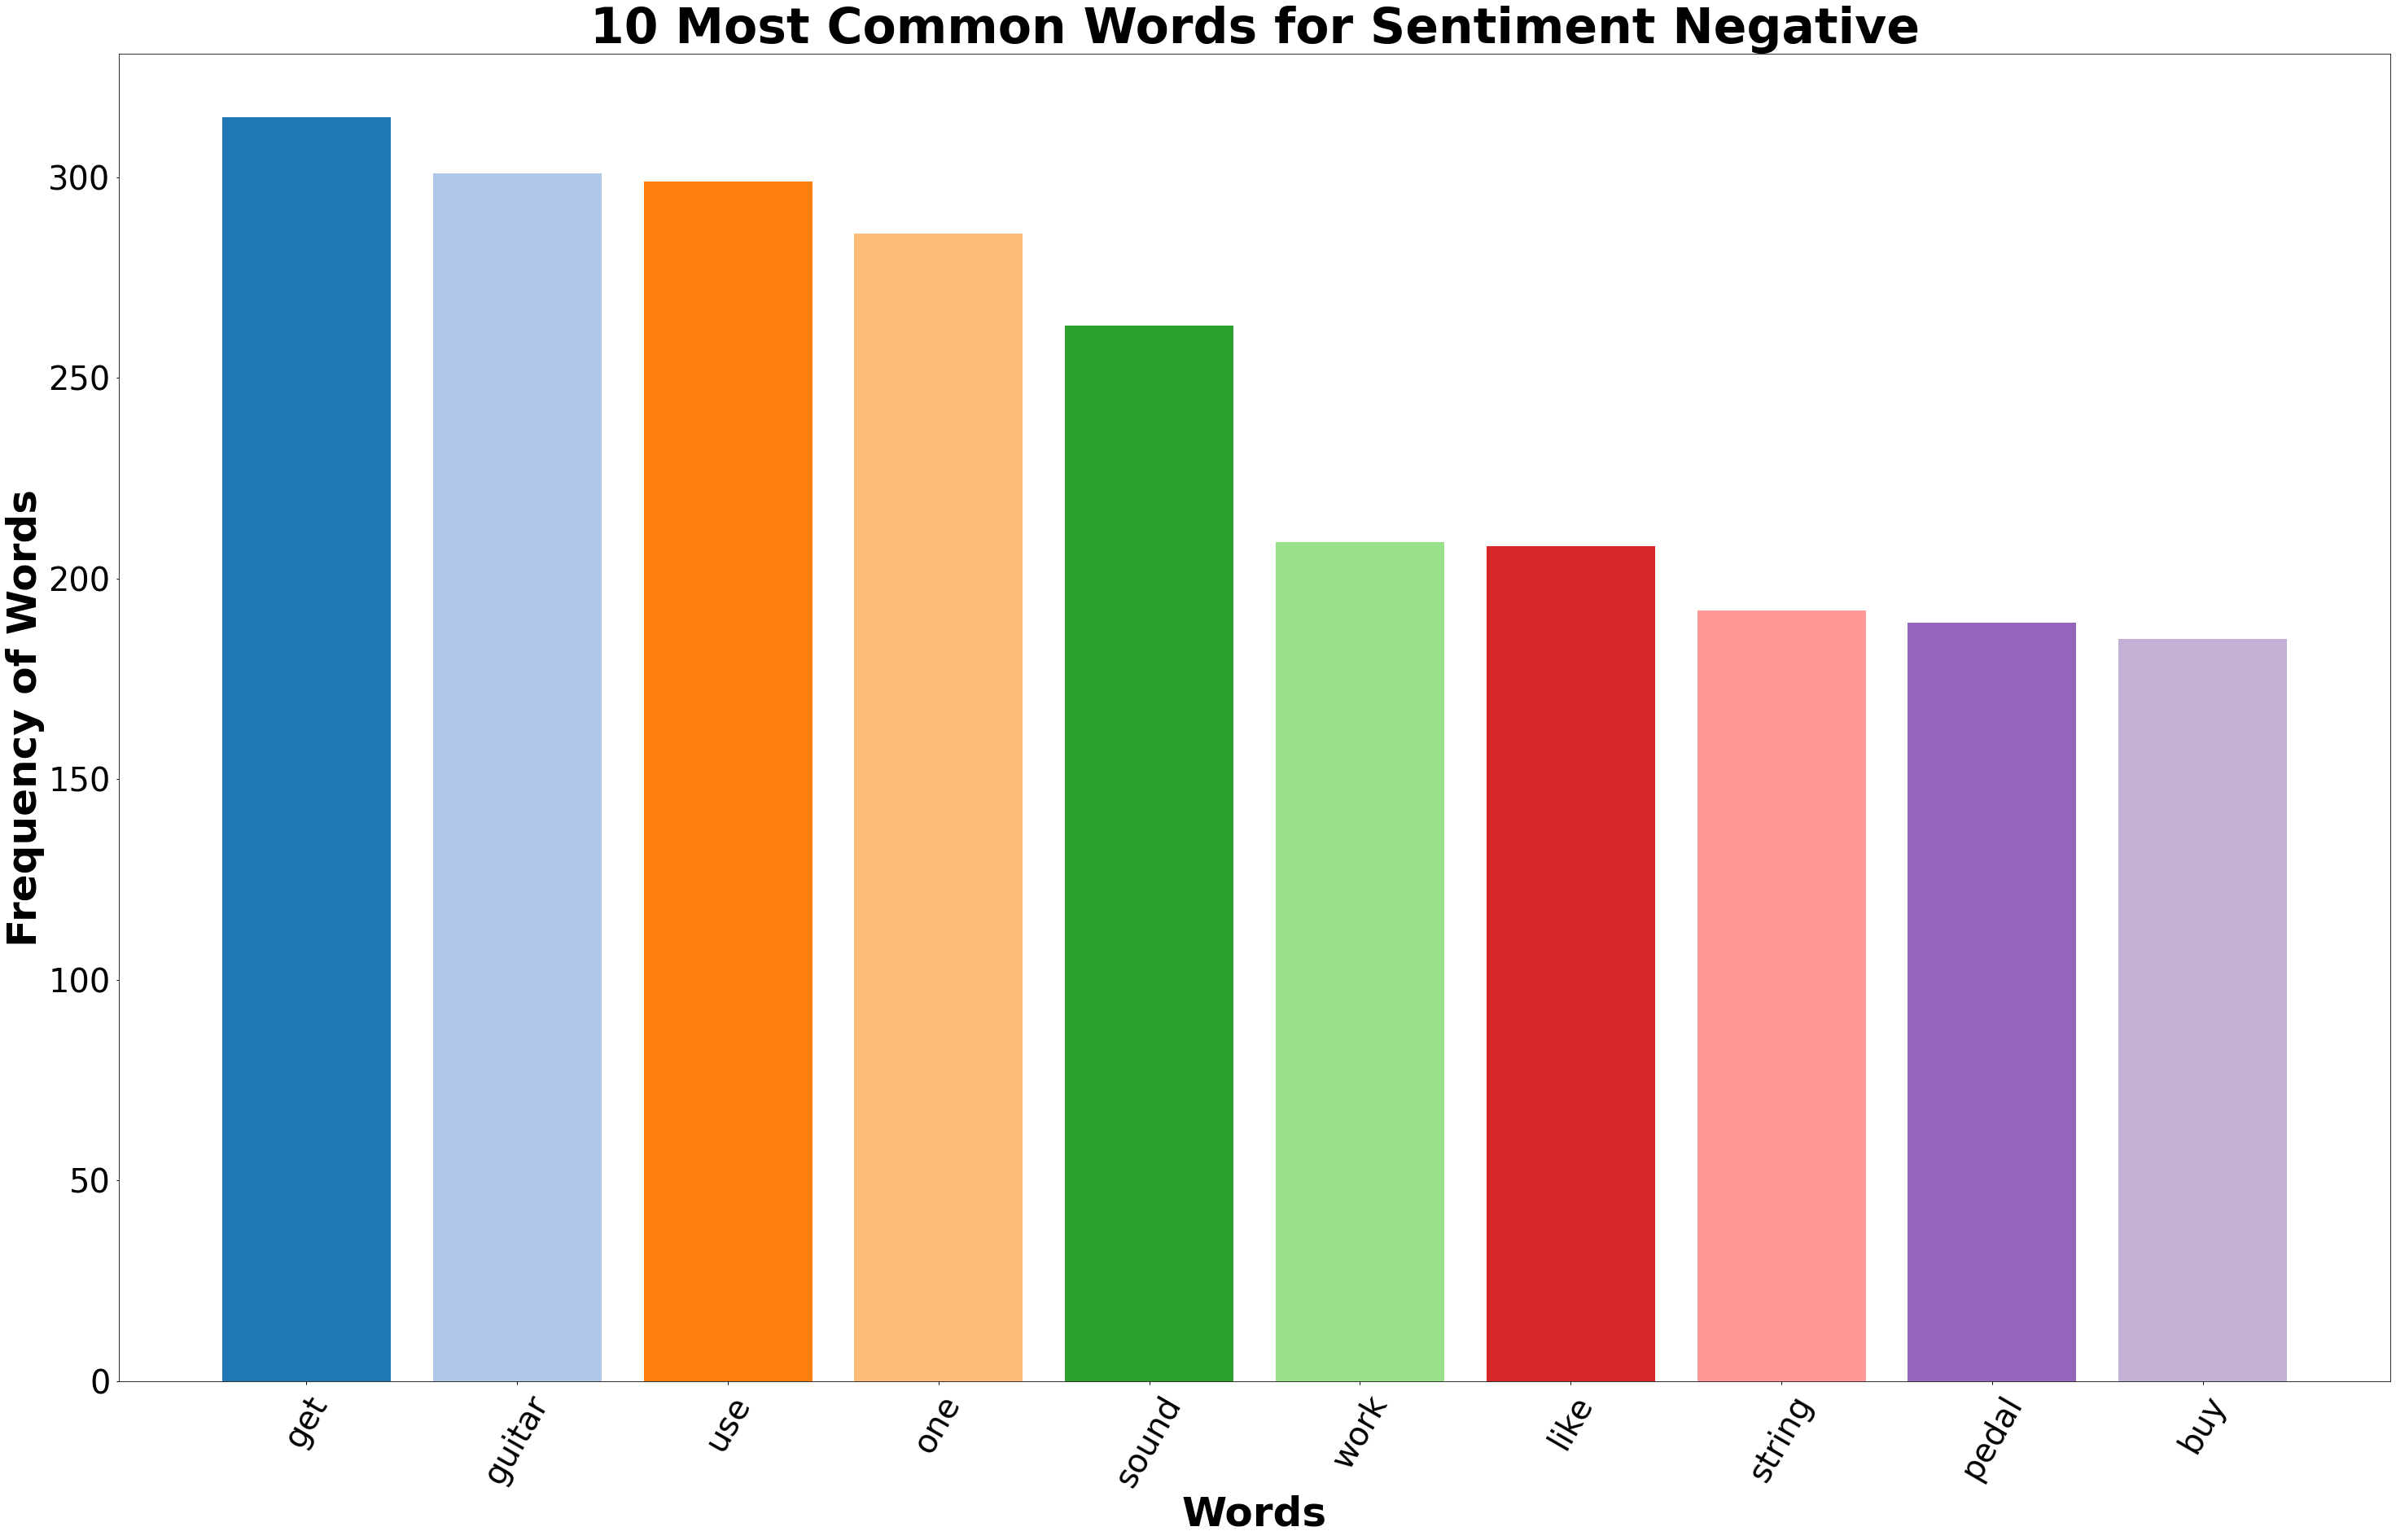

In [107]:
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
col_map = plt.get_cmap('tab20')

plt.figure(figsize=(50,30))
plt.bar(words0, freq0,color=col_map.colors)
plt.xlabel('Words',weight="bold", fontsize=50)
plt.ylabel('Frequency of Words',weight="bold", fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('10 Most Common Words for Sentiment Negative',weight="bold", fontsize=60)
plt.show()

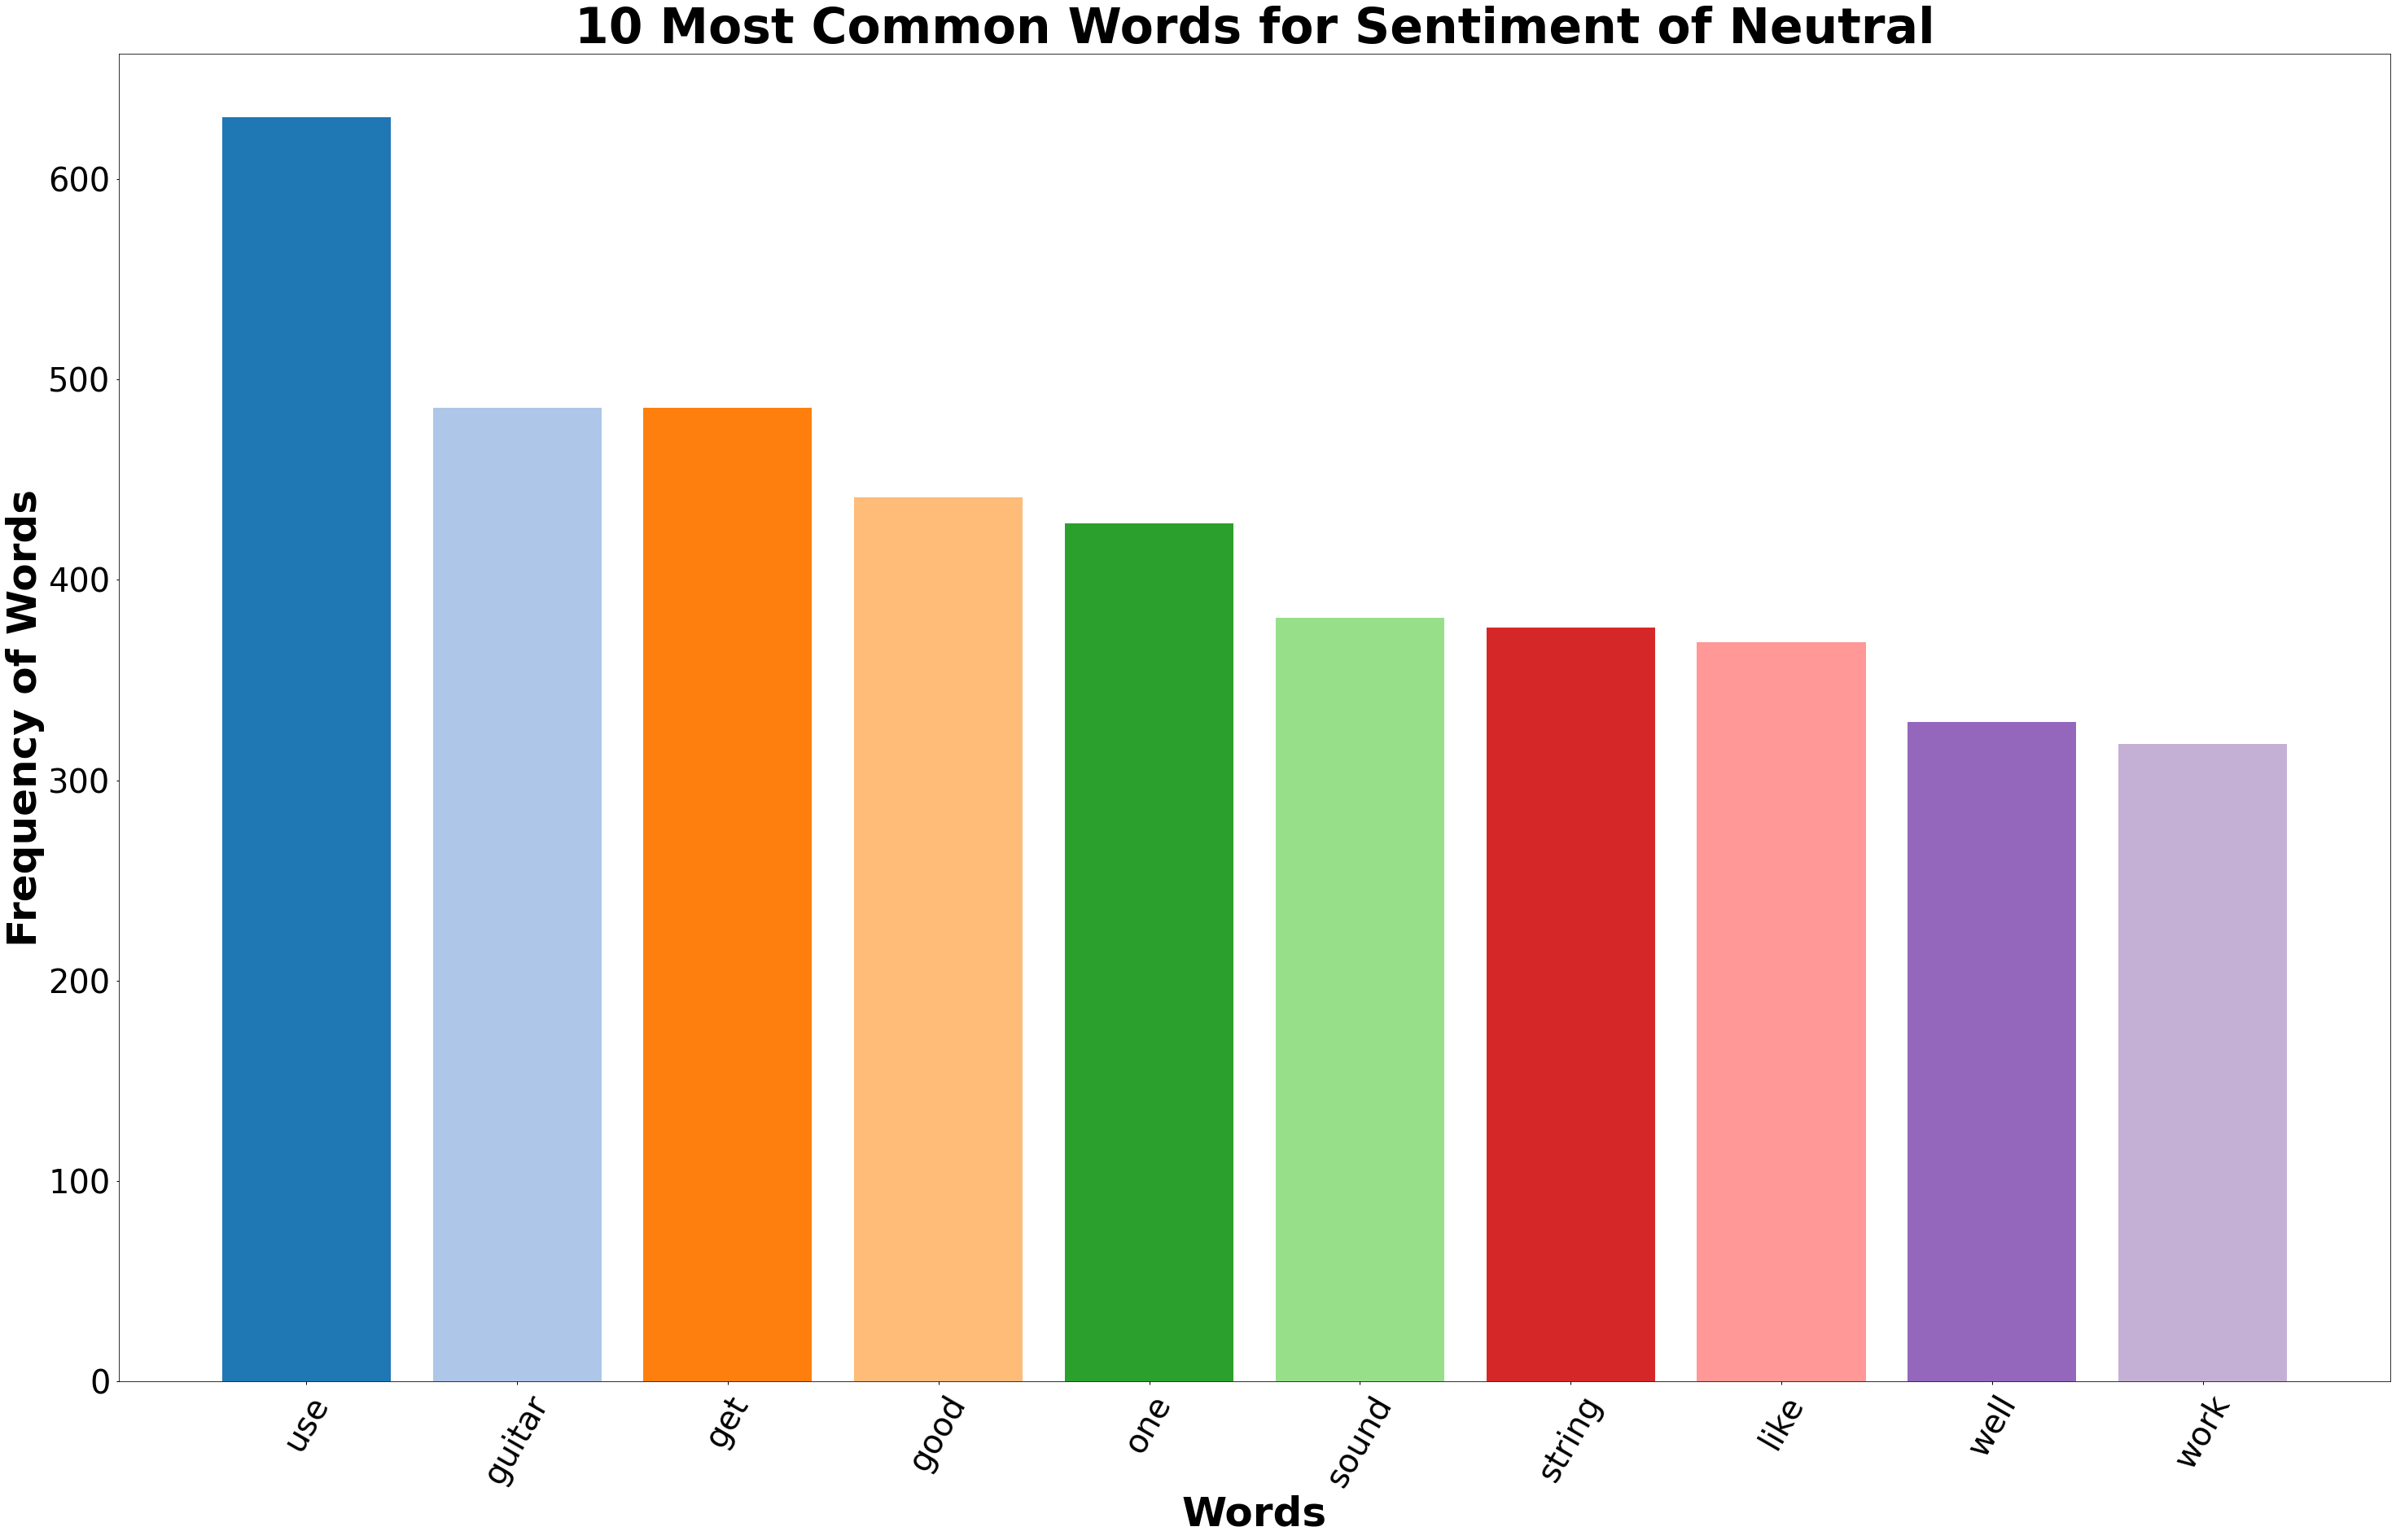

In [108]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
col_map = plt.get_cmap('tab20')

plt.bar(words1, freq1,color=col_map.colors)
plt.xlabel('Words', weight="bold",fontsize=50)
plt.ylabel('Frequency of Words', weight="bold",fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('10 Most Common Words for Sentiment of Neutral',weight="bold", fontsize=60)
plt.show()

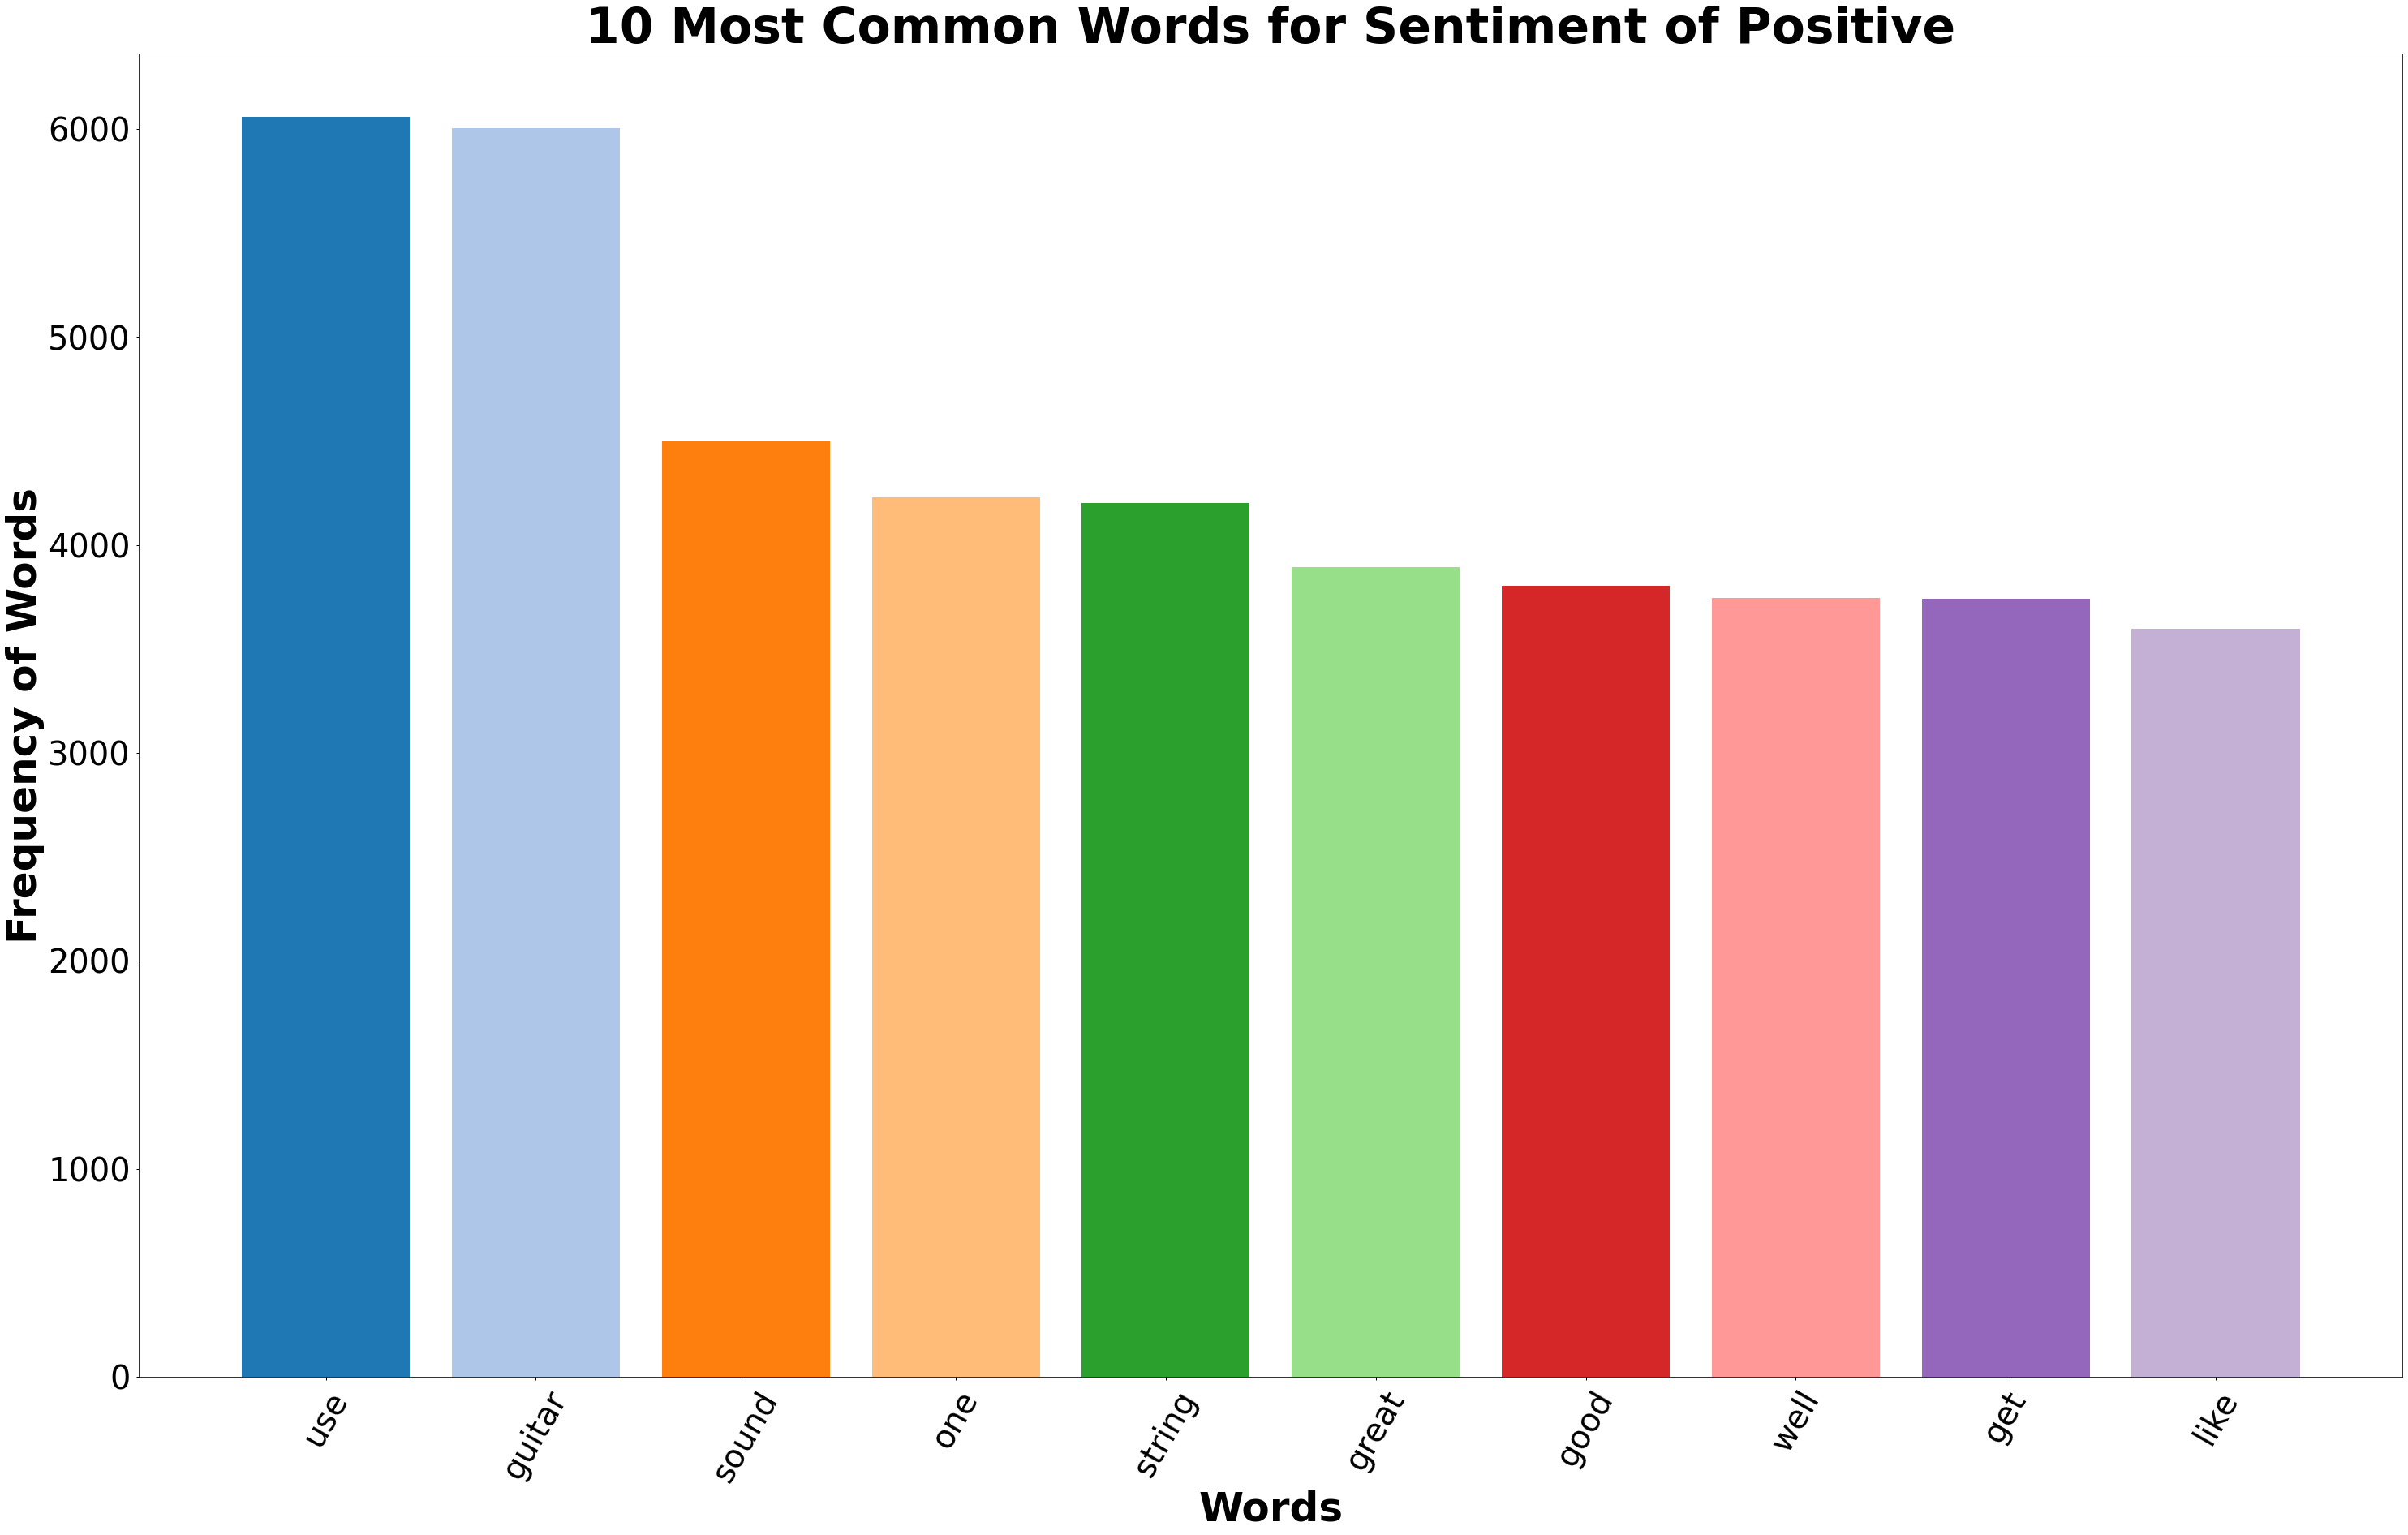

In [109]:
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
col_map = plt.get_cmap('tab20')

plt.bar(words2, freq2,color=col_map.colors)
plt.xlabel('Words',weight="bold", fontsize=50)
plt.ylabel('Frequency of Words', weight="bold",fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('10 Most Common Words for Sentiment of Positive',weight="bold", fontsize=60)
plt.show()


In [110]:
df_analysis.head(5)

,sentiment,overall,lemmatized,lemma_str,sentiment_lematized,review_len,word_count
0,Positive,5,"[tuner, affordable, work, well, purchase, six, far, sturdy, come, battery, box, install, actuall...",tuner affordable work well purchase six far sturdy come battery box install actually sat one tho...,0.202306,696,115
1,Positive,5,"[simple, operate, make, well, bargaintasticif, know, noise, gate, suppose, think, might, need, o...",simple operate make well bargaintasticif know noise gate suppose think might need one highly rec...,0.090000,309,50
2,Neutral,3,"[put, gibson, j, increase, bass, ok, j, strength, ruin, wonderful, clarity, balance, guitar, als...",put gibson j increase bass ok j strength ruin wonderful clarity balance guitar also take little ...,0.158690,473,80
3,Neutral,3,"[oh, crybaby, crybaby, wah, suck, crybaby, tire, hearing, statement, guitarist, fresh, even, tel...",oh crybaby crybaby wah suck crybaby tire hearing statement guitarist fresh even tell many string...,0.203992,1214,205
4,Positive,4,"[microphone, amazon, may, best, mic, home, studio, one, mark, spot, get, budget]",microphone amazon may best mic home studio one mark spot get budget,1.000000,67,12


In [111]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10234 entries, 0 to 10260
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sentiment            10234 non-null  object 
 1   overall              10234 non-null  int64  
 2   lemmatized           10234 non-null  object 
 3   lemma_str            10234 non-null  object 
 4   sentiment_lematized  10234 non-null  float64
 5   review_len           10234 non-null  int64  
 6   word_count           10234 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 897.7+ KB


# Topic Modelling

In [112]:
# you have to feed strings into a countvec
# max_df=0.9 we will remove words which appear in more than 90% of the reviews
# min_df=25 we will remove words which appear in less than 25 reviews

# Creating the vectorizer object
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)

# apply the transformation to create the document term matrix
tf = tf_vectorizer.fit_transform(df_analysis['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()

In [113]:
tf

<10234x1811 sparse matrix of type '<class 'numpy.int64'>'
	with 313538 stored elements in Compressed Sparse Row format>

In [114]:
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,ability,able,absolutely,abuse,ac,acceptable,access,accessory,accuracy,accurate,...,yeah,year,yellow,yes,yet,young,youtube,zero,zipper,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
lda_model = LatentDirichletAllocation(n_components=3, learning_method='online', max_iter=500, random_state=0).fit(tf)


In [116]:
print(lda_model)

LatentDirichletAllocation(learning_method='online', max_iter=500,
                          n_components=3, random_state=0)


In [117]:
#Kümelememiz gereken Konu sayısını
no_top_words = 10

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)
#LDA tarafından keşfedilen, her  birindeki konular ve en iyi kelimeler alacağız

Topic 0:
guitar one use well stand strap work good get make
Topic 1:
pedal sound use amp get cable good one great like
Topic 2:
string guitar pick use play sound tuner tune like great


**NMF with tf-idf**

In [118]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)

tfidf = tfidf_vectorizer.fit_transform(df_analysis['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [119]:
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,ability,able,absolutely,abuse,ac,acceptable,access,accessory,accuracy,accurate,...,yeah,year,yellow,yes,yet,young,youtube,zero,zipper,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.033886,0.0,0.0,0.0,0.071201,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
10230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
10231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
10232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [131]:

#obtain a NMF model.
nmf = NMF(n_components=3, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
#fit the model
display_topics(nmf, tfidf_feature_names, no_top_words) 

Topic 0:
pedal sound amp cable get use good great tone like
Topic 1:
string sound guitar play last great addario tune good acoustic
Topic 2:
guitar pick strap one use work well stand tuner great


In [132]:
nmf_topic_values = nmf.transform(tfidf)
df_analysis['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
df_analysis['lda_topics'] = lda_topic_values.argmax(axis=1)

In [133]:
df_analysis

,sentiment,overall,lemmatized,lemma_str,sentiment_lematized,review_len,word_count,nmf_topics,lda_topics
0,Positive,5,"[tuner, affordable, work, well, purchase, six, far, sturdy, come, battery, box, install, actuall...",tuner affordable work well purchase six far sturdy come battery box install actually sat one tho...,0.202306,696,115,2,2
1,Positive,5,"[simple, operate, make, well, bargaintasticif, know, noise, gate, suppose, think, might, need, o...",simple operate make well bargaintasticif know noise gate suppose think might need one highly rec...,0.090000,309,50,0,1
2,Neutral,3,"[put, gibson, j, increase, bass, ok, j, strength, ruin, wonderful, clarity, balance, guitar, als...",put gibson j increase bass ok j strength ruin wonderful clarity balance guitar also take little ...,0.158690,473,80,2,2
3,Neutral,3,"[oh, crybaby, crybaby, wah, suck, crybaby, tire, hearing, statement, guitarist, fresh, even, tel...",oh crybaby crybaby wah suck crybaby tire hearing statement guitarist fresh even tell many string...,0.203992,1214,205,0,1
4,Positive,4,"[microphone, amazon, may, best, mic, home, studio, one, mark, spot, get, budget]",microphone amazon may best mic home studio one mark spot get budget,1.000000,67,12,2,1
...,...,...,...,...,...,...,...,...,...
10256,Positive,4,"[great, foot, rest]",great foot rest,0.800000,15,3,0,0
10257,Positive,5,"[would, must, twice, price]",would must twice price,0.000000,22,4,2,0
10258,Positive,5,"[make, sound, like, pro]",make sound like pro,0.400000,19,4,0,1
10259,Positive,5,"[power, sound, sound, great]",power sound sound great,0.533333,23,4,0,1


# Data Modeling

In [134]:
X = df_analysis.lemma_str
y = df_analysis.sentiment

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [136]:
# you have to feed strings into a countvec
# max_df=0.9 we will remove words which appear in more than 90% of the reviews
# min_df=25 we will remove words which appear in less than 25 reviews
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,aa,aaa,ab,aback,abalone,abandon,abcd,abelton,abhorrent,abide,...,zippo,zoid,zoidszoid,zombie,zone,zoom,zt,zune,zvex,zzounds
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Logistic Regression Classifier**

In [137]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [138]:
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [139]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Pred_Negative','Pred_Neutral', 'Pred_Positive'], 
                yticklabels=['Act_Negative','Act_Neutral', 'Act_Positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    a_neg, a_neu, a_pos = cm[0]
    b_neg, b_neu, b_pos = cm[1]
    c_neg, c_neu, c_pos = cm[2]

    accuracy = round((a_neg + b_neu + c_pos) / (a_neg+a_neu+a_pos + b_neg+b_neu+b_pos + c_neg+c_neu+c_pos),2)
    negative = round((a_neg) / (a_neg+a_neu+a_pos),2)
    neutral = round((b_neu) / (b_neg+b_neu+b_pos),2)
    positive = round((c_pos) / (c_neg+c_neu+c_pos),2)

    cm_results = [accuracy, negative, neutral, positive]
    return cm_results

In [140]:
print(y_pred_cv1)

['Positive' 'Positive' 'Neutral' ... 'Positive' 'Positive' 'Positive']


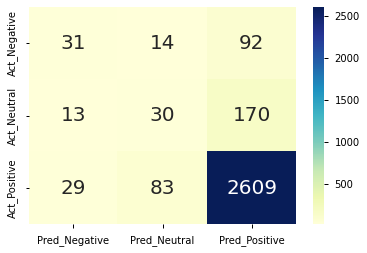

In [142]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

**Naive Bayes Classifier**

In [143]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [144]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv1, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv1)

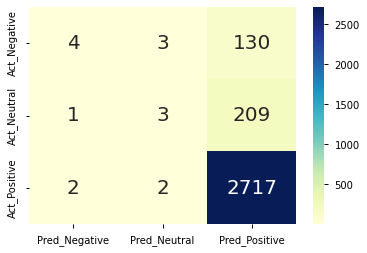

In [145]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_cv1_nb)

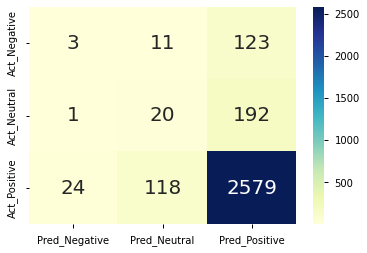

In [146]:
# Here's the heat map for the second Naive Bayes model
cm4 = conf_matrix(y_test, y_pred_cv2_nb)

**KNN Classifier**

In [147]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the first KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_cv1, y_train)

y_pred_cv1_knn = knn.predict(X_test_cv1)

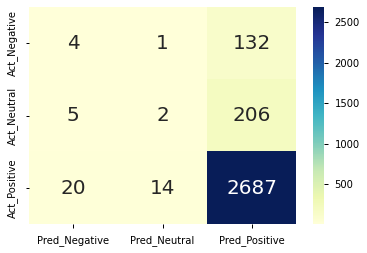

In [148]:
cm5 = conf_matrix(y_test, y_pred_cv1_knn)

**Try using TF-IDF instead of Count Vectorizer**

In [149]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

**Logistic Regression**

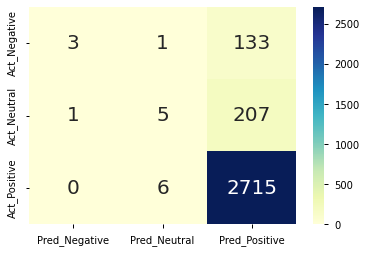

In [150]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm6 = conf_matrix(y_test, y_pred_tfidf1_lr)

**Naive Bayes**

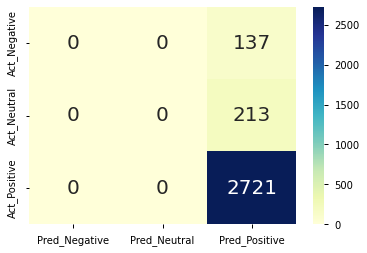

In [151]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
cm7 = conf_matrix(y_test, y_pred_tfidf1_nb)

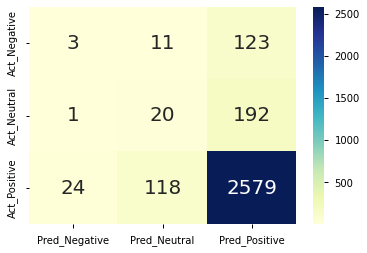

In [152]:
# Fit the second Naive Bayes model on the TF-IDF data
bnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf2_nb = bnb.predict(X_test_tfidf1)
cm8 = conf_matrix(y_test, y_pred_tfidf2_nb)

**KNN**

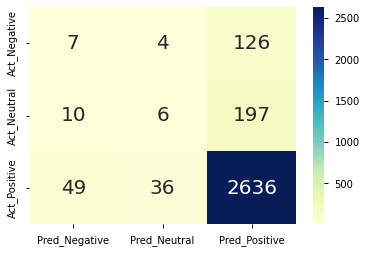

In [153]:
# Fit the first KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_tfidf1.toarray(), y_train)
y_pred_cv1_tfidf_knn = knn.predict(X_test_tfidf1)
cm9 = conf_matrix(y_test, y_pred_cv1_tfidf_knn)

In [154]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm1, cm3, cm4, cm5, cm6, cm7, cm8, cm9)))
results_tf = results_tf.set_index([['Accuracy', 'Negative Accuracy', 'Neutral Accuracy', 'Positive Accuracy']])
results_tf.columns = ['LR_CV', 'MNB_CV', 'BNB_CV', 'KNN_CV', 'LR_TFIDF', 'MNB_TFIDF', 'BNB_TFIDF', 'KNN_TFIDF']
results_tf

,LR_CV,MNB_CV,BNB_CV,KNN_CV,LR_TFIDF,MNB_TFIDF,BNB_TFIDF,KNN_TFIDF
Accuracy,0.87,0.89,0.85,0.88,0.89,0.89,0.85,0.86
Negative Accuracy,0.23,0.03,0.02,0.03,0.02,0.00,0.02,0.05
Neutral Accuracy,0.14,0.01,0.09,0.01,0.02,0.00,0.09,0.03
Positive Accuracy,0.96,1.00,0.95,0.99,1.00,1.00,0.95,0.97
